In [162]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sklearn
import matplotlib
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.metrics import mean_absolute_percentage_error

In [7]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.22.2
Pandas Version 1.3.5
Seaborn Version 0.11.1
Matplotlib Version 3.3.4


In [8]:
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

In [9]:
# import os
# os.chdir('C:\\GL Class\\Solution Preparation\EDA')
d1= pd.read_csv('Data.csv')

In [10]:
pd.options.display.max_columns = None

In [11]:
#visual inspection of data
#1.head of the data set

In [12]:
d1.head()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,0,Male,97,31.2,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,0,Male,212,34.2,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,0,Female,166,40.4,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,0,Female,109,22.9,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,1,Male,118,26.5,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616


In [13]:
d1.head().T

,0,1,2,3,4
applicant_id,5000,5001,5002,5003,5004
years_of_insurance_with_us,3,0,1,7,3
regular_checkup_lasy_year,1,0,0,4,1
adventure_sports,1,0,0,0,0
Occupation,Salried,Student,Business,Business,Student
visited_doctor_last_1_year,2,4,4,2,2
cholesterol_level,125 to 150,150 to 175,200 to 225,175 to 200,150 to 175
daily_avg_steps,4866,6411,4509,6214,4938
age,28,50,68,51,44
heart_decs_history,1,0,0,0,0


In [14]:
#2.Number of rows and columns

In [15]:
## Checking the shape of the data: Number of columns and rows
print("The number of rows and columns in the given dataset is",d1.shape)

The number of rows and columns in the given dataset is (25000, 24)


In [16]:
#3.Descriptive details

In [17]:
d1.describe()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,visited_doctor_last_1_year,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,Year_last_admitted,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,17499.500000,4.089040,0.773680,0.081720,3.104200,5215.889320,44.918320,0.054640,0.098160,167.530000,31.393328,2003.892217,71.610480,2.517960,28.812280,27147.407680
std,7217.022701,2.606612,1.199449,0.273943,1.141663,1053.179748,16.107492,0.227281,0.297537,62.729712,7.876535,7.581521,9.325183,1.690335,8.632382,14323.691832
min,5000.000000,0.000000,0.000000,0.000000,0.000000,2034.000000,16.000000,0.000000,0.000000,57.000000,12.300000,1990.000000,52.000000,0.000000,11.000000,2468.000000
25%,11249.750000,2.000000,0.000000,0.000000,2.000000,4543.000000,31.000000,0.000000,0.000000,113.000000,26.100000,1997.000000,64.000000,1.000000,21.000000,16042.000000
50%,17499.500000,4.000000,0.000000,0.000000,3.000000,5089.000000,45.000000,0.000000,0.000000,168.000000,30.500000,2004.000000,72.000000,3.000000,31.000000,27148.000000
75%,23749.250000,6.000000,1.000000,0.000000,4.000000,5730.000000,59.000000,0.000000,0.000000,222.000000,35.600000,2010.000000,78.000000,4.000000,36.000000,37020.000000
max,29999.000000,8.000000,5.000000,1.000000,12.000000,11255.000000,74.000000,1.000000,1.000000,277.000000,100.600000,2018.000000,96.000000,6.000000,42.000000,67870.000000


In [18]:
d1.describe().T

,count,mean,std,min,25%,50%,75%,max
applicant_id,25000.0,17499.500000,7217.022701,5000.0,11249.75,17499.5,23749.25,29999.0
years_of_insurance_with_us,25000.0,4.089040,2.606612,0.0,2.00,4.0,6.00,8.0
regular_checkup_lasy_year,25000.0,0.773680,1.199449,0.0,0.00,0.0,1.00,5.0
adventure_sports,25000.0,0.081720,0.273943,0.0,0.00,0.0,0.00,1.0
visited_doctor_last_1_year,25000.0,3.104200,1.141663,0.0,2.00,3.0,4.00,12.0
daily_avg_steps,25000.0,5215.889320,1053.179748,2034.0,4543.00,5089.0,5730.00,11255.0
age,25000.0,44.918320,16.107492,16.0,31.00,45.0,59.00,74.0
heart_decs_history,25000.0,0.054640,0.227281,0.0,0.00,0.0,0.00,1.0
other_major_decs_history,25000.0,0.098160,0.297537,0.0,0.00,0.0,0.00,1.0
avg_glucose_level,25000.0,167.530000,62.729712,57.0,113.00,168.0,222.00,277.0


In [19]:
#Understanding of the attributes

In [20]:
#1.Varaible info

In [21]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [22]:
#2.renaming of the varaibles

In [23]:
d1['Occupation']=np.where(d1['Occupation'] =='Salried', 'Salaried', d1['Occupation'])
d1['Occupation'].unique()

array(['Salaried', 'Student', 'Business'], dtype=object)

In [24]:
d1.rename(columns = {'regular_checkup_lasy_year':'regular_checkup_last_year'}, inplace = True)

In [25]:
d1.head()

,applicant_id,years_of_insurance_with_us,regular_checkup_last_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salaried,2,125 to 150,4866,28,1,0,Male,97,31.2,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,0,Male,212,34.2,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,0,Female,166,40.4,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,0,Female,109,22.9,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,1,Male,118,26.5,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616


In [26]:
#3.Checking for duplicate variables

In [27]:
d1.duplicated().sum()

0

In [28]:
#EDA for continuous variable

In [29]:
#Hsitogram and boxplot

In [30]:
#1.years_of_insurance_with_us

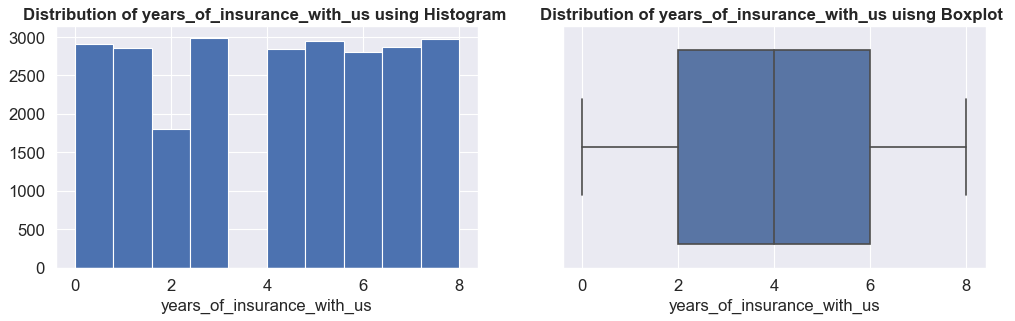

<Figure size 432x288 with 0 Axes>

In [31]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(d1['years_of_insurance_with_us'])
plt.xlabel('years_of_insurance_with_us', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of years_of_insurance_with_us using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='years_of_insurance_with_us',data=d1)
plt.xlabel('years_of_insurance_with_us', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of years_of_insurance_with_us uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [32]:
#2.regular_checkup_last_year

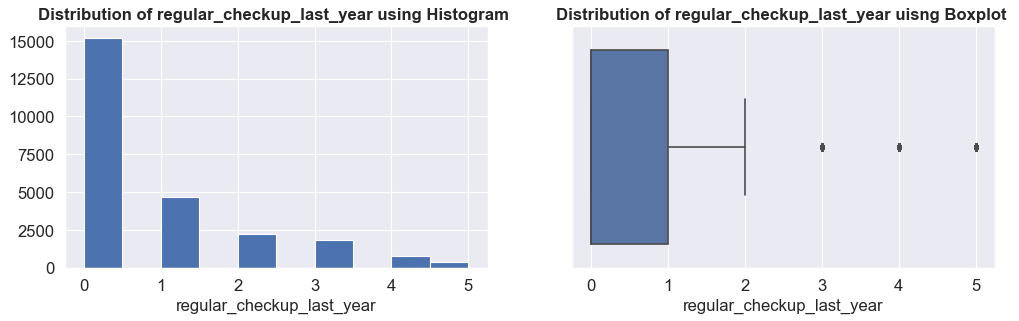

<Figure size 432x288 with 0 Axes>

In [33]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(d1['regular_checkup_last_year'])
plt.xlabel('regular_checkup_last_year', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of regular_checkup_last_year using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='regular_checkup_last_year',data=d1)
plt.xlabel('regular_checkup_last_year', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of regular_checkup_last_year uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [34]:
#3.visited_doctor_last_1_year

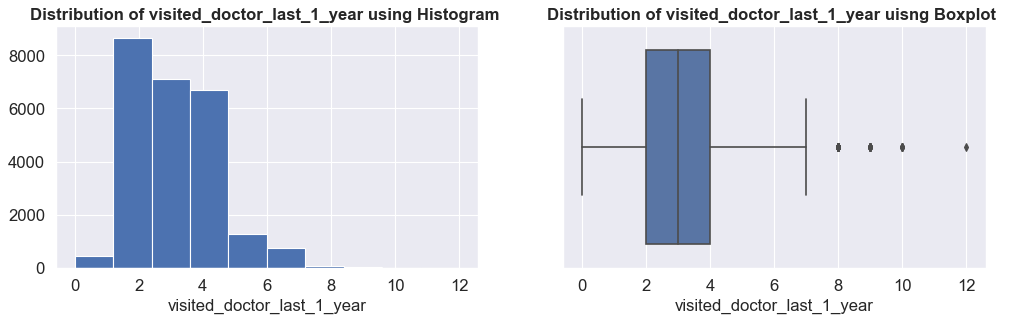

<Figure size 432x288 with 0 Axes>

In [35]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(d1['visited_doctor_last_1_year'])
plt.xlabel('visited_doctor_last_1_year', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of visited_doctor_last_1_year using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='visited_doctor_last_1_year',data=d1)
plt.xlabel('visited_doctor_last_1_year', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of visited_doctor_last_1_year uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [36]:
#4.daily_avg_steps

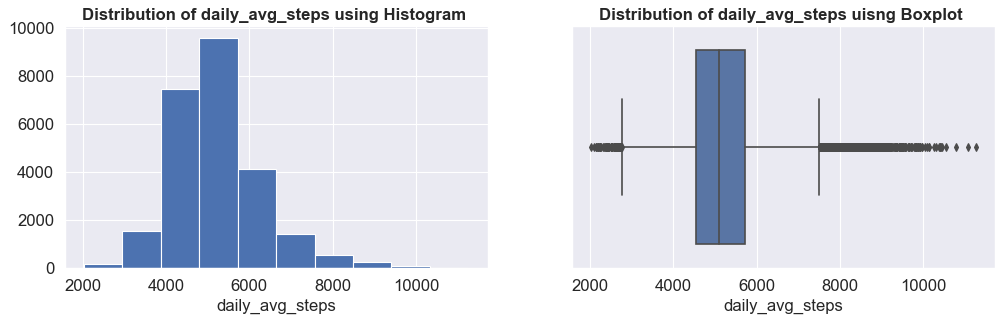

<Figure size 432x288 with 0 Axes>

In [37]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(d1['daily_avg_steps'])
plt.xlabel('daily_avg_steps', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of daily_avg_steps using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='daily_avg_steps',data=d1)
plt.xlabel('daily_avg_steps', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of daily_avg_steps uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [38]:
#5.age

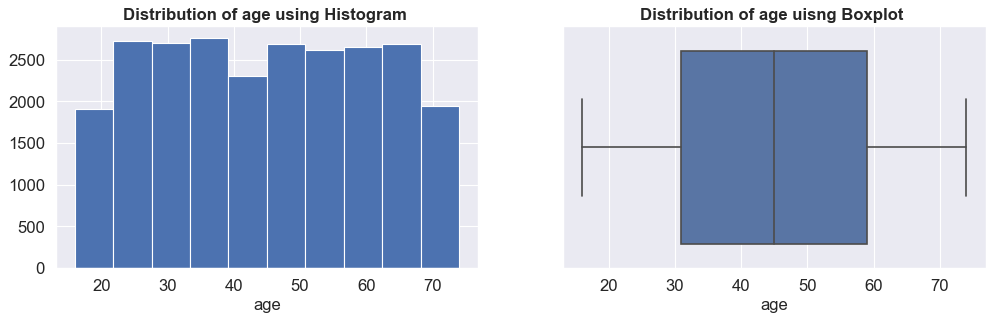

<Figure size 432x288 with 0 Axes>

In [39]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(d1['age'])
plt.xlabel('age', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of age using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='age',data=d1)
plt.xlabel('age', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of age uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [40]:
#6.avg_glucose_level

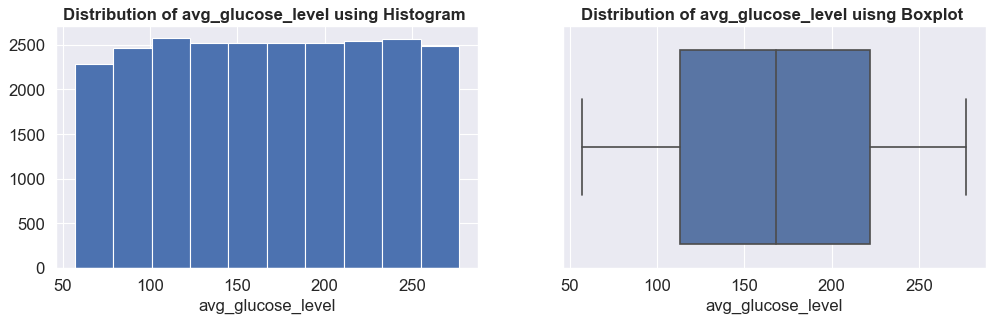

<Figure size 432x288 with 0 Axes>

In [41]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(d1['avg_glucose_level'])
plt.xlabel('avg_glucose_level', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of avg_glucose_level using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='avg_glucose_level',data=d1)
plt.xlabel('avg_glucose_level', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of avg_glucose_level uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [42]:
#7.bmi

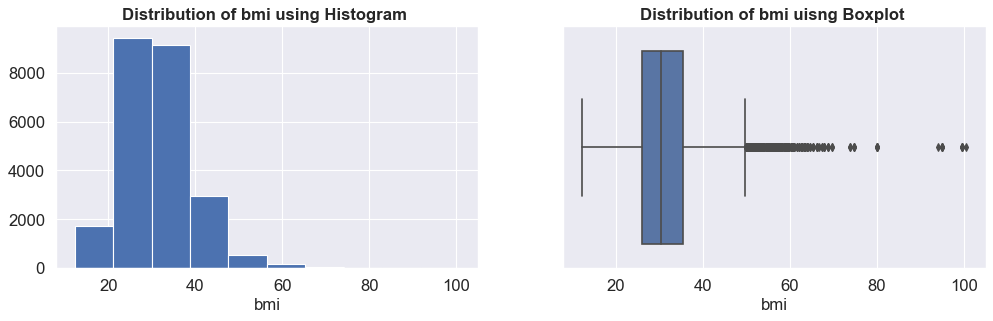

<Figure size 432x288 with 0 Axes>

In [43]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(d1['bmi'])
plt.xlabel('bmi', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of bmi using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='bmi',data=d1)
plt.xlabel('bmi', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of bmi uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [44]:
#8.weight

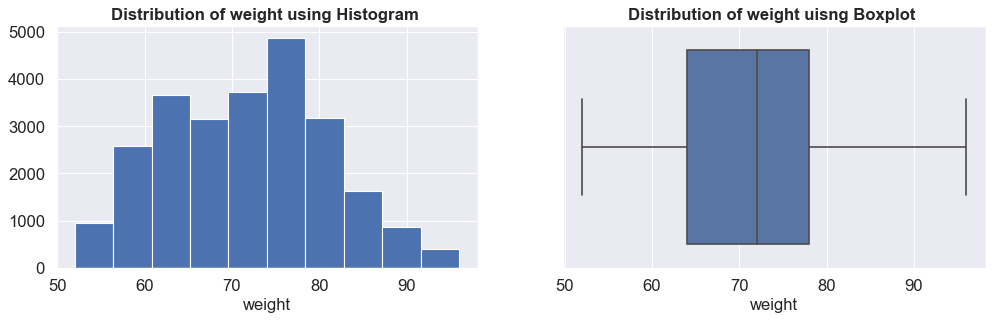

<Figure size 432x288 with 0 Axes>

In [45]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(d1['weight'])
plt.xlabel('weight', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of weight using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='weight',data=d1)
plt.xlabel('weight', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of weight uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [46]:
#9.weight_change_in_last_one_year

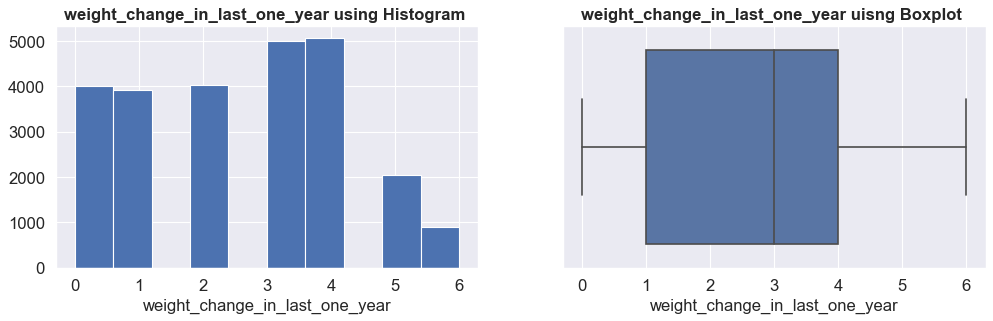

<Figure size 432x288 with 0 Axes>

In [47]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(d1['weight_change_in_last_one_year'])
plt.xlabel('weight_change_in_last_one_year', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('weight_change_in_last_one_year using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='weight_change_in_last_one_year',data=d1)
plt.xlabel('weight_change_in_last_one_year', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('weight_change_in_last_one_year uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [48]:
#10.fat_percentage

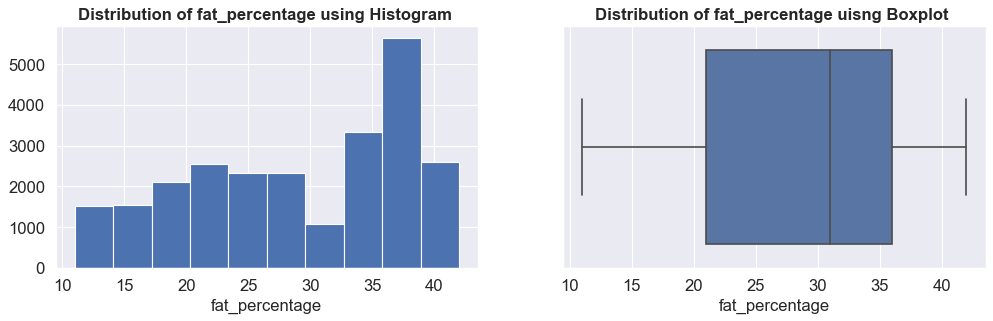

<Figure size 432x288 with 0 Axes>

In [49]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(d1['fat_percentage'])
plt.xlabel('fat_percentage', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of fat_percentage using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='fat_percentage',data=d1)
plt.xlabel('fat_percentage', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of fat_percentage uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [50]:
#11.insurance_cost

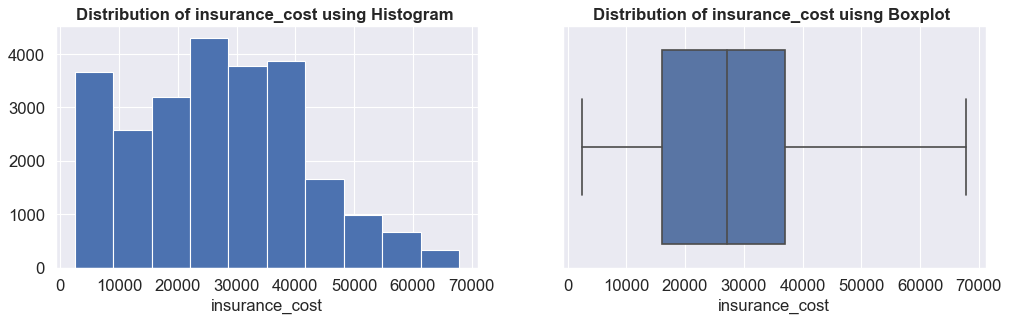

<Figure size 432x288 with 0 Axes>

In [51]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(d1['insurance_cost'])
plt.xlabel('insurance_cost', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of insurance_cost using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='insurance_cost',data=d1)
plt.xlabel('insurance_cost', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of insurance_cost uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [52]:
#bivariate analysis for continuous columns

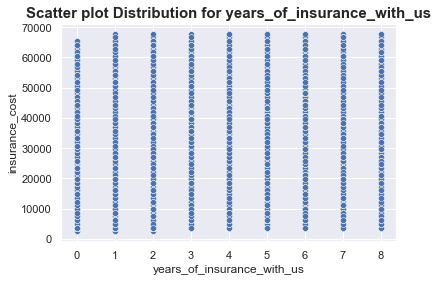

In [53]:
a = sns.scatterplot(x=d1['years_of_insurance_with_us'], y=d1['insurance_cost'])
a.set_title("Scatter plot Distribution for years_of_insurance_with_us",fontsize=15,fontweight='bold')
plt.show()

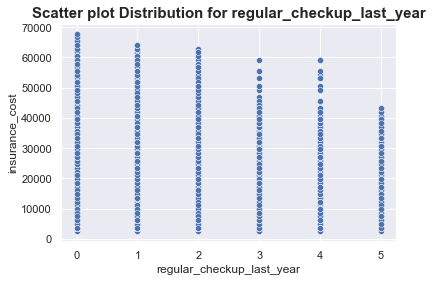

In [54]:
a = sns.scatterplot(x=d1['regular_checkup_last_year'], y=d1['insurance_cost'])
a.set_title("Scatter plot Distribution for regular_checkup_last_year",fontsize=15,fontweight='bold')
plt.show()

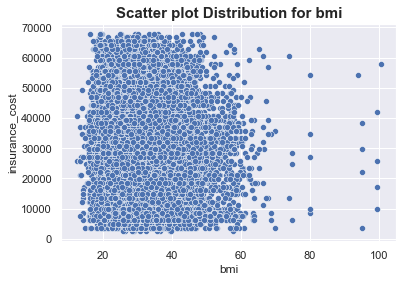

In [55]:
a = sns.scatterplot(x=d1['bmi'], y=d1['insurance_cost'])
a.set_title("Scatter plot Distribution for bmi",fontsize=15,fontweight='bold')
plt.show()

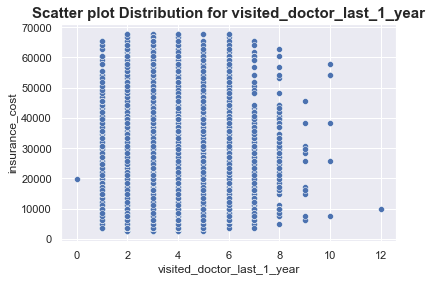

In [56]:
a = sns.scatterplot(x=d1['visited_doctor_last_1_year'], y=d1['insurance_cost'])
a.set_title("Scatter plot Distribution for visited_doctor_last_1_year",fontsize=15,fontweight='bold')
plt.show()

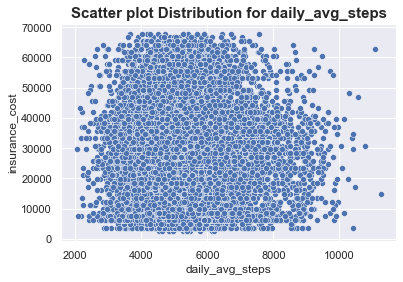

In [57]:
a = sns.scatterplot(x=d1['daily_avg_steps'], y=d1['insurance_cost'])
a.set_title("Scatter plot Distribution for daily_avg_steps",fontsize=15,fontweight='bold')
plt.show()

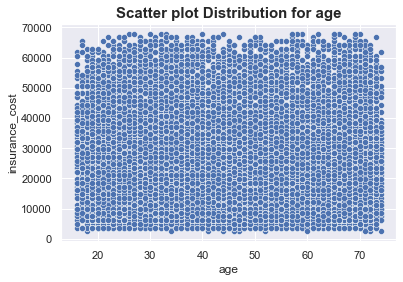

In [58]:
a = sns.scatterplot(x=d1['age'], y=d1['insurance_cost'])
a.set_title("Scatter plot Distribution for age",fontsize=15,fontweight='bold')
plt.show()

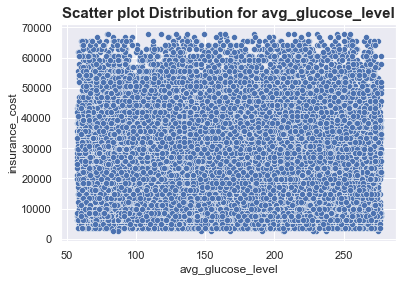

In [59]:
a = sns.scatterplot(x=d1['avg_glucose_level'], y=d1['insurance_cost'])
a.set_title("Scatter plot Distribution for avg_glucose_level",fontsize=15,fontweight='bold')
plt.show()

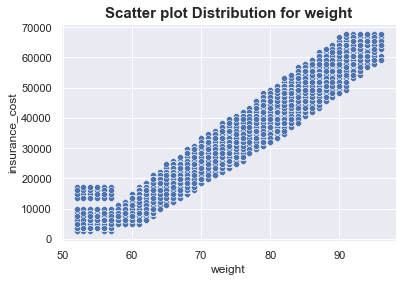

In [60]:
a = sns.scatterplot(x=d1['weight'], y=d1['insurance_cost'])
a.set_title("Scatter plot Distribution for weight",fontsize=15,fontweight='bold')
plt.show()

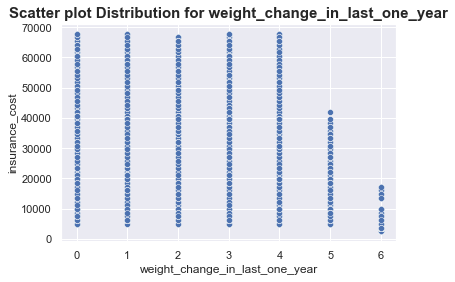

In [61]:
a = sns.scatterplot(x=d1['weight_change_in_last_one_year'], y=d1['insurance_cost'])
a.set_title("Scatter plot Distribution for weight_change_in_last_one_year",fontsize=15,fontweight='bold')
plt.show()

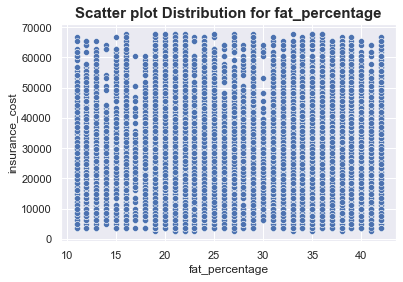

In [62]:
a = sns.scatterplot(x=d1['fat_percentage'], y=d1['insurance_cost'])
a.set_title("Scatter plot Distribution for fat_percentage",fontsize=15,fontweight='bold')
plt.show()

In [63]:
#EDA for categorical variables

In [64]:
#Count plot and Box plot

In [65]:
#1.adventure_sports

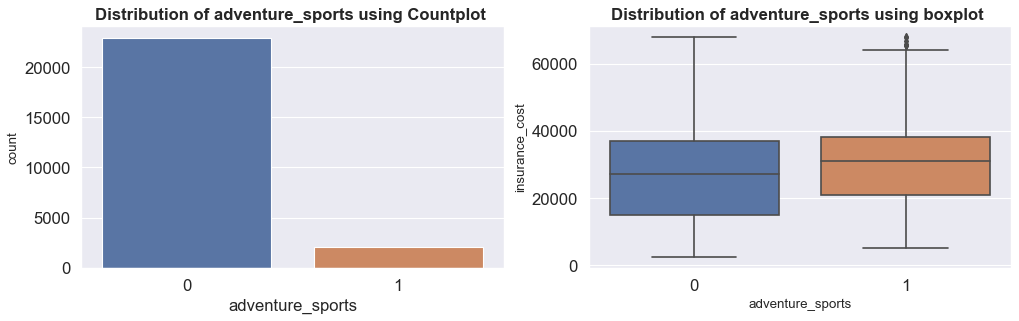

<Figure size 432x288 with 0 Axes>

In [66]:

#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = d1, x ='adventure_sports')
plt.xlabel('adventure_sports', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of adventure_sports using Countplot ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='adventure_sports',y='insurance_cost',data=d1)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of adventure_sports using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


In [67]:
#2.heart_decs_history

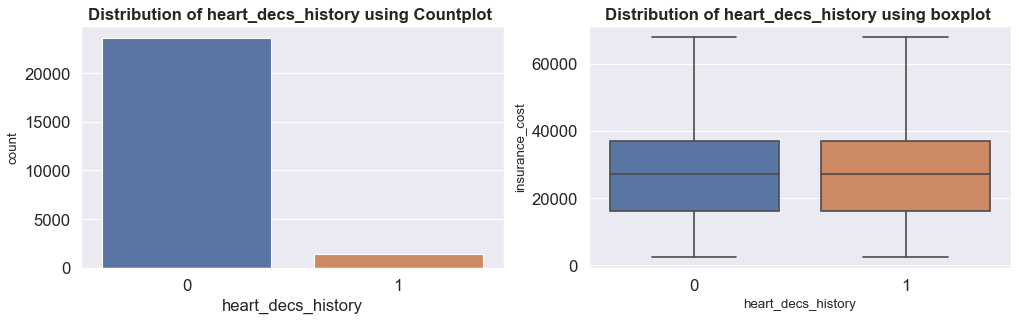

<Figure size 432x288 with 0 Axes>

In [68]:

#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = d1, x ='heart_decs_history')
plt.xlabel('heart_decs_history', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of heart_decs_history using Countplot ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='heart_decs_history',y='insurance_cost',data=d1)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of heart_decs_history using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


In [69]:
#3.other_major_decs_history

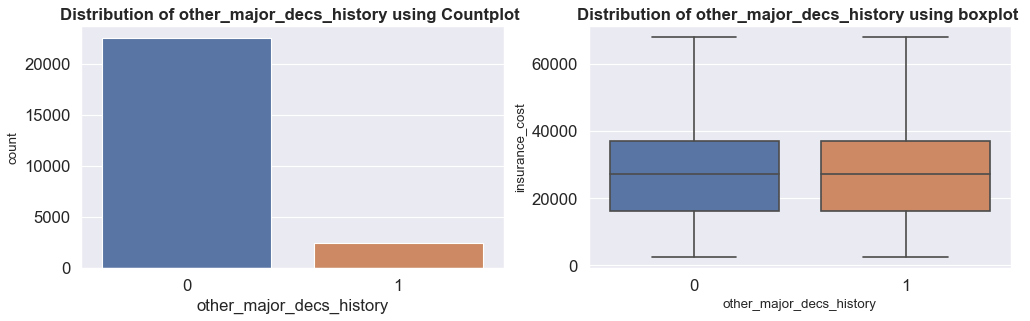

<Figure size 432x288 with 0 Axes>

In [70]:

#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = d1, x ='other_major_decs_history')
plt.xlabel('other_major_decs_history', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of other_major_decs_history using Countplot ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='other_major_decs_history',y='insurance_cost',data=d1)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of other_major_decs_history using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


In [71]:
#4.Occupation

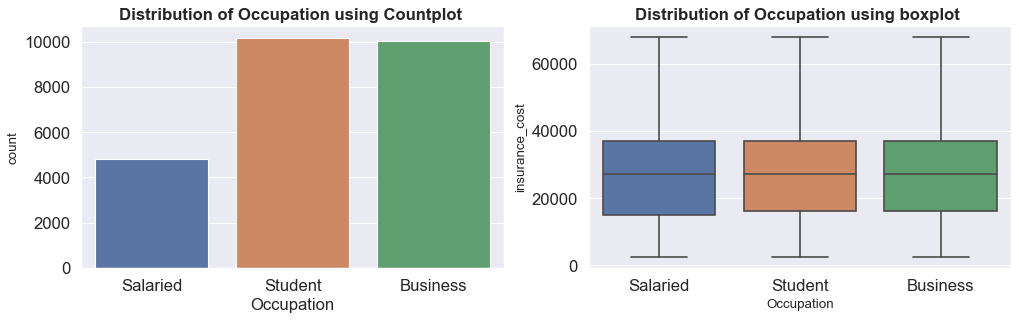

<Figure size 432x288 with 0 Axes>

In [72]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = d1, x ='Occupation')
plt.xlabel('Occupation', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Occupation using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Occupation',y='insurance_cost',data=d1)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Occupation using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [73]:
#5.cholesterol_level

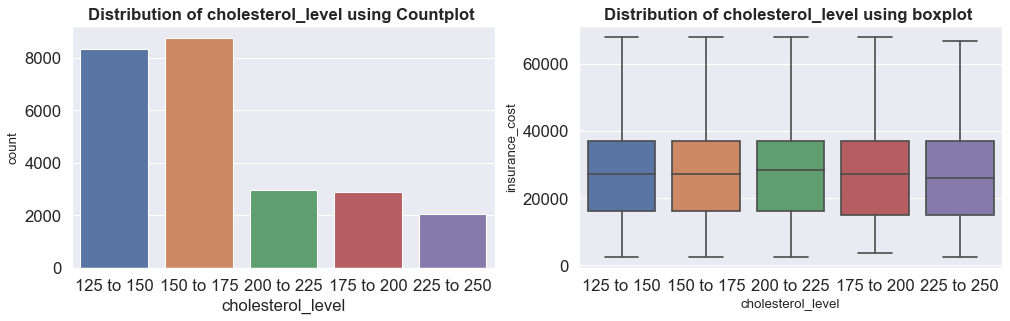

<Figure size 432x288 with 0 Axes>

In [74]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = d1, x ='cholesterol_level')
plt.xlabel('cholesterol_level', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of cholesterol_level using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='cholesterol_level',y='insurance_cost',data=d1)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of cholesterol_level using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [75]:
#6.Gender

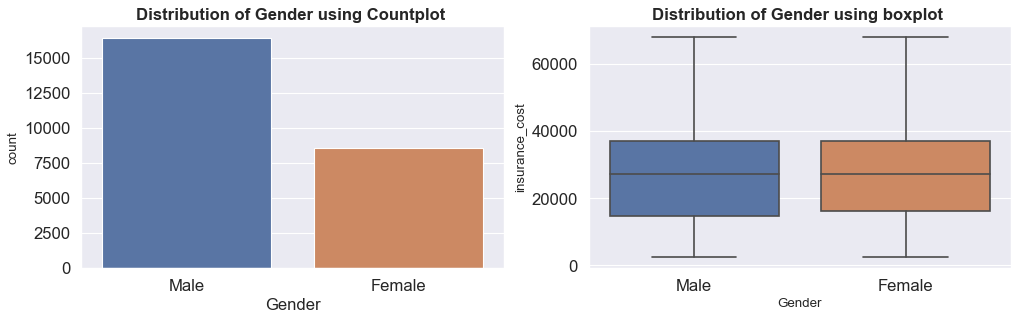

<Figure size 432x288 with 0 Axes>

In [76]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = d1, x ='Gender')
plt.xlabel('Gender', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Gender using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Gender',y='insurance_cost',data=d1)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Gender using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [77]:
#7.smoking_status

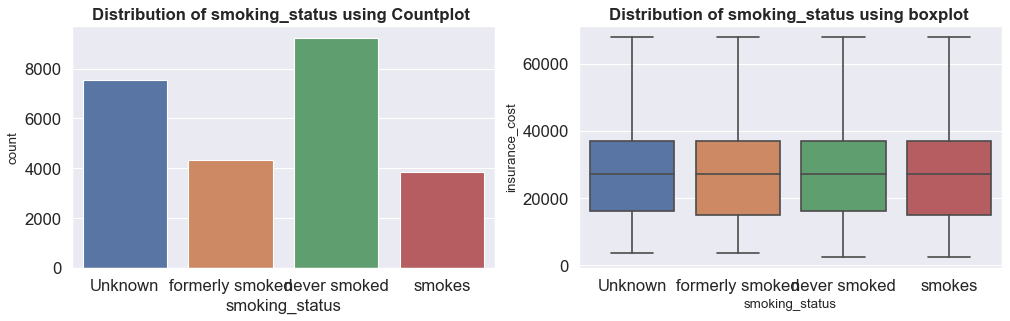

<Figure size 432x288 with 0 Axes>

In [78]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = d1, x ='smoking_status')
plt.xlabel('smoking_status', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of smoking_status using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='smoking_status',y='insurance_cost',data=d1)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of smoking_status using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [79]:
#8.Location

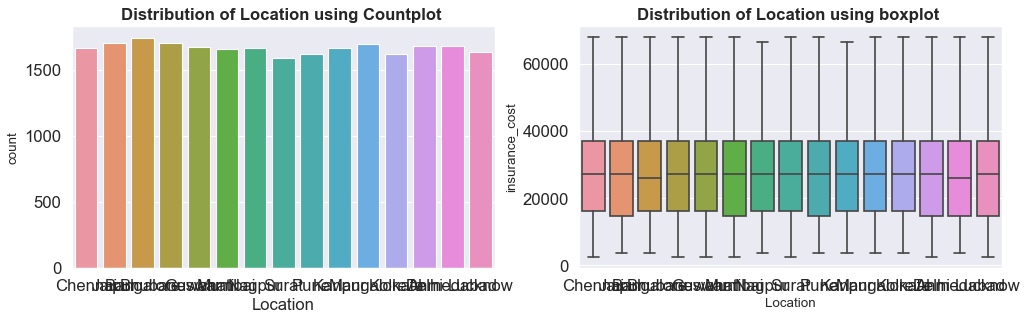

<Figure size 432x288 with 0 Axes>

In [80]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = d1, x ='Location')
plt.xlabel('Location', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Location using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Location',y='insurance_cost',data=d1)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Location using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [81]:
#9.covered_by_any_other_company

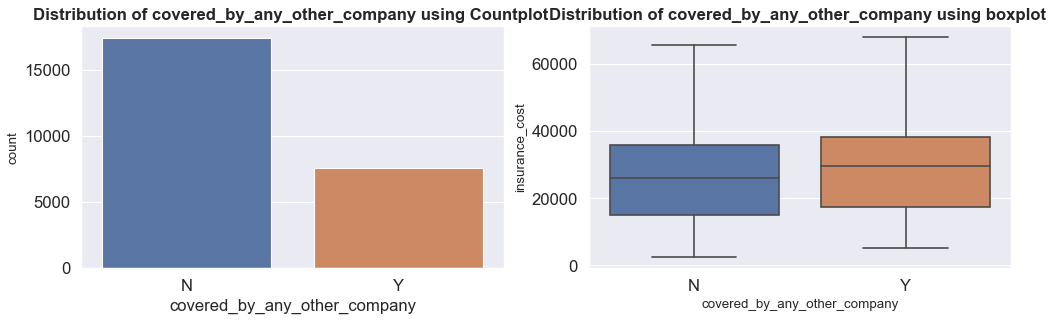

<Figure size 432x288 with 0 Axes>

In [82]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = d1, x ='covered_by_any_other_company')
plt.xlabel('covered_by_any_other_company', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of covered_by_any_other_company using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='covered_by_any_other_company',y='insurance_cost',data=d1)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of covered_by_any_other_company using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [83]:
#10.Alcohol

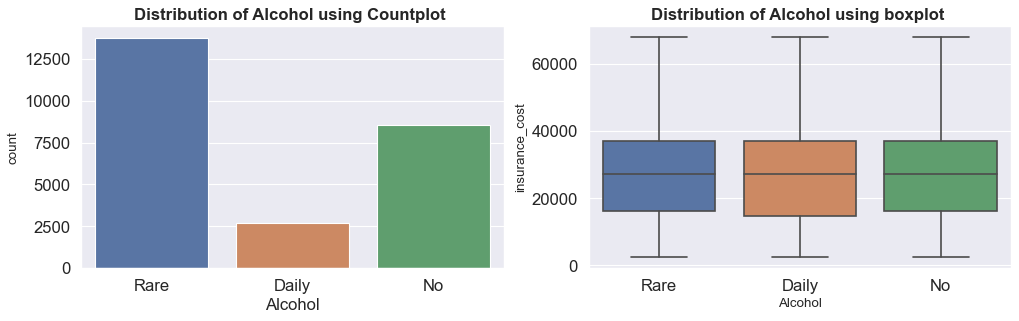

<Figure size 432x288 with 0 Axes>

In [84]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = d1, x ='Alcohol')
plt.xlabel('Alcohol', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Alcohol using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Alcohol',y='insurance_cost',data=d1)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Alcohol using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [85]:
#11.Exercise

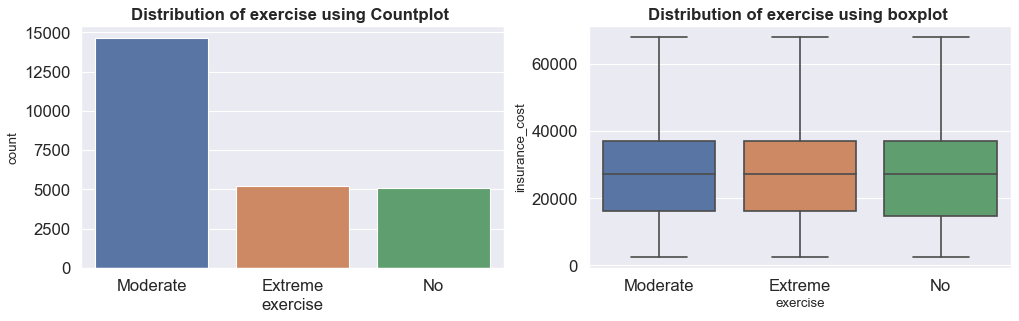

<Figure size 432x288 with 0 Axes>

In [86]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = d1, x ='exercise')
plt.xlabel('exercise', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of exercise using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='exercise',y='insurance_cost',data=d1)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of exercise using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

In [87]:
#Removal of unwanted variable

In [88]:
d1.drop(columns=['Year_last_admitted','applicant_id'],inplace=True)

In [89]:
d1.head()

,years_of_insurance_with_us,regular_checkup_last_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,3,1,1,Salaried,2,125 to 150,4866,28,1,0,Male,97,31.2,Unknown,Chennai,67,N,Rare,Moderate,1,25,20978
1,0,0,0,Student,4,150 to 175,6411,50,0,0,Male,212,34.2,formerly smoked,Jaipur,58,N,Rare,Moderate,3,27,6170
2,1,0,0,Business,4,200 to 225,4509,68,0,0,Female,166,40.4,formerly smoked,Jaipur,73,N,Daily,Extreme,0,32,28382
3,7,4,0,Business,2,175 to 200,6214,51,0,0,Female,109,22.9,Unknown,Chennai,71,Y,Rare,No,3,37,27148
4,3,1,0,Student,2,150 to 175,4938,44,0,1,Male,118,26.5,never smoked,Bangalore,74,N,No,Extreme,0,34,29616


In [90]:
#encoding of the categorical variables

In [91]:
d1['cholesterol_level']=np.where(d1['cholesterol_level'] =='125 to 150', '1', d1['cholesterol_level'])
d1['cholesterol_level']=np.where(d1['cholesterol_level'] =='150 to 175', '2', d1['cholesterol_level'])
d1['cholesterol_level']=np.where(d1['cholesterol_level'] =='175 to 200', '3', d1['cholesterol_level'])
d1['cholesterol_level']=np.where(d1['cholesterol_level'] =='200 to 225', '4', d1['cholesterol_level'])
d1['cholesterol_level']=np.where(d1['cholesterol_level'] =='225 to 250', '5', d1['cholesterol_level'])

In [92]:
d1['Location'].replace(to_replace ="Surat",value ="1",inplace=True)
d1['Location'].replace(to_replace ="Kolkata",value ="2",inplace=True)
d1['Location'].replace(to_replace ="Pune",value ="3",inplace=True)
d1['Location'].replace(to_replace ="Lucknow",value ="4",inplace=True)
d1['Location'].replace(to_replace ="Mumbai",value ="5",inplace=True)
d1['Location'].replace(to_replace ="Nagpur",value ="6",inplace=True)
d1['Location'].replace(to_replace ="Kanpur",value ="7",inplace=True)
d1['Location'].replace(to_replace ="Chennai",value ="8",inplace=True)
d1['Location'].replace(to_replace ="Guwahati",value ="9",inplace=True)
d1['Location'].replace(to_replace ="Ahmedabad",value ="10",inplace=True)
d1['Location'].replace(to_replace ="Delhi",value ="11",inplace=True)
d1['Location'].replace(to_replace ="Mangalore",value ="12",inplace=True)
d1['Location'].replace(to_replace ="Bhubaneswar",value ="13",inplace=True)
d1['Location'].replace(to_replace ="Jaipur",value ="14",inplace=True)
d1['Location'].replace(to_replace ="Bangalore",value ="15",inplace=True)

In [93]:
#df1=pd.get_dummies(df,columns=cat1,drop_first=True)
d1_new=pd.get_dummies(d1,columns=['Occupation','Gender','smoking_status','covered_by_any_other_company','Alcohol','exercise'],drop_first=True)

In [94]:
d1_new.head()

,years_of_insurance_with_us,regular_checkup_last_year,adventure_sports,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,Location,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost,Occupation_Salaried,Occupation_Student,Gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,covered_by_any_other_company_Y,Alcohol_No,Alcohol_Rare,exercise_Moderate,exercise_No
0,3,1,1,2,1,4866,28,1,0,97,31.2,8,67,1,25,20978,1,0,1,0,0,0,0,0,1,1,0
1,0,0,0,4,2,6411,50,0,0,212,34.2,14,58,3,27,6170,0,1,1,1,0,0,0,0,1,1,0
2,1,0,0,4,4,4509,68,0,0,166,40.4,14,73,0,32,28382,0,0,0,1,0,0,0,0,0,0,0
3,7,4,0,2,3,6214,51,0,0,109,22.9,8,71,3,37,27148,0,0,0,0,0,0,1,0,1,0,1
4,3,1,0,2,2,4938,44,0,1,118,26.5,15,74,0,34,29616,0,1,1,0,1,0,0,1,0,0,0


In [95]:
d1_new.head().T

,0,1,2,3,4
years_of_insurance_with_us,3,0,1,7,3
regular_checkup_last_year,1,0,0,4,1
adventure_sports,1,0,0,0,0
visited_doctor_last_1_year,2,4,4,2,2
cholesterol_level,1,2,4,3,2
daily_avg_steps,4866,6411,4509,6214,4938
age,28,50,68,51,44
heart_decs_history,1,0,0,0,0
other_major_decs_history,0,0,0,0,1
avg_glucose_level,97,212,166,109,118


In [96]:
d1_new.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'cholesterol_level',
       'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'avg_glucose_level', 'bmi', 'Location',
       'weight', 'weight_change_in_last_one_year', 'fat_percentage',
       'insurance_cost', 'Occupation_Salaried', 'Occupation_Student',
       'Gender_Male', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'covered_by_any_other_company_Y', 'Alcohol_No', 'Alcohol_Rare',
       'exercise_Moderate', 'exercise_No'],
      dtype='object')

In [97]:
#Missing value treatment

In [98]:
d1.isnull().sum()

years_of_insurance_with_us          0
regular_checkup_last_year           0
adventure_sports                    0
Occupation                          0
visited_doctor_last_1_year          0
cholesterol_level                   0
daily_avg_steps                     0
age                                 0
heart_decs_history                  0
other_major_decs_history            0
Gender                              0
avg_glucose_level                   0
bmi                               990
smoking_status                      0
Location                            0
weight                              0
covered_by_any_other_company        0
Alcohol                             0
exercise                            0
weight_change_in_last_one_year      0
fat_percentage                      0
insurance_cost                      0
dtype: int64

In [99]:
predictors = d1_new.drop('insurance_cost', axis = 1)
response = d1_new['insurance_cost']

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [101]:
d2 = pd.concat([scaled_predictors, response], axis = 1)

In [102]:
from sklearn.impute import KNNImputer #MICE FancyImpute

In [103]:
imputer = KNNImputer(n_neighbors=10)

In [104]:
d1_imputed = pd.DataFrame(imputer.fit_transform(d2), columns = d2.columns)

In [105]:
d1_imputed.isnull().sum()

years_of_insurance_with_us        0
regular_checkup_last_year         0
adventure_sports                  0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
avg_glucose_level                 0
bmi                               0
Location                          0
weight                            0
weight_change_in_last_one_year    0
fat_percentage                    0
Occupation_Salaried               0
Occupation_Student                0
Gender_Male                       0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
covered_by_any_other_company_Y    0
Alcohol_No                        0
Alcohol_Rare                      0
exercise_Moderate                 0
exercise_No                       0
insurance_cost                    0
dtype: int64

In [106]:
d1_imputed['cholesterol_level']=d1_new['cholesterol_level']

In [107]:
d1_imputed.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'cholesterol_level',
       'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'avg_glucose_level', 'bmi', 'Location',
       'weight', 'weight_change_in_last_one_year', 'fat_percentage',
       'Occupation_Salaried', 'Occupation_Student', 'Gender_Male',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'covered_by_any_other_company_Y', 'Alcohol_No',
       'Alcohol_Rare', 'exercise_Moderate', 'exercise_No', 'insurance_cost'],
      dtype='object')

In [108]:
d1_imputed.isnull().sum()

years_of_insurance_with_us        0
regular_checkup_last_year         0
adventure_sports                  0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
avg_glucose_level                 0
bmi                               0
Location                          0
weight                            0
weight_change_in_last_one_year    0
fat_percentage                    0
Occupation_Salaried               0
Occupation_Student                0
Gender_Male                       0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
covered_by_any_other_company_Y    0
Alcohol_No                        0
Alcohol_Rare                      0
exercise_Moderate                 0
exercise_No                       0
insurance_cost                    0
dtype: int64

In [109]:
d1_imputed.dtypes

years_of_insurance_with_us        float64
regular_checkup_last_year         float64
adventure_sports                  float64
visited_doctor_last_1_year        float64
cholesterol_level                  object
daily_avg_steps                   float64
age                               float64
heart_decs_history                float64
other_major_decs_history          float64
avg_glucose_level                 float64
bmi                               float64
Location                          float64
weight                            float64
weight_change_in_last_one_year    float64
fat_percentage                    float64
Occupation_Salaried               float64
Occupation_Student                float64
Gender_Male                       float64
smoking_status_formerly smoked    float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
covered_by_any_other_company_Y    float64
Alcohol_No                        float64
Alcohol_Rare                      

In [110]:

d1_imputed['cholesterol_level'] = d1_imputed['cholesterol_level'].astype('float64')  # converting the cholesterol_level column from object / string type to float


In [111]:
d1_imputed.dtypes

years_of_insurance_with_us        float64
regular_checkup_last_year         float64
adventure_sports                  float64
visited_doctor_last_1_year        float64
cholesterol_level                 float64
daily_avg_steps                   float64
age                               float64
heart_decs_history                float64
other_major_decs_history          float64
avg_glucose_level                 float64
bmi                               float64
Location                          float64
weight                            float64
weight_change_in_last_one_year    float64
fat_percentage                    float64
Occupation_Salaried               float64
Occupation_Student                float64
Gender_Male                       float64
smoking_status_formerly smoked    float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
covered_by_any_other_company_Y    float64
Alcohol_No                        float64
Alcohol_Rare                      

In [112]:
#Outlier treatment

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


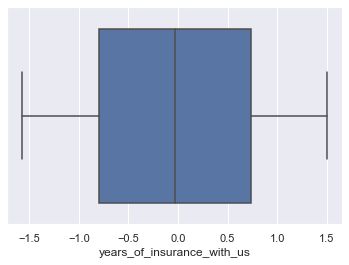

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


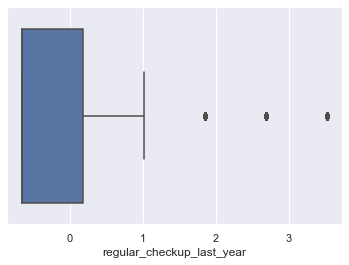

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


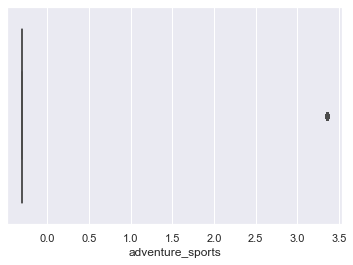

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


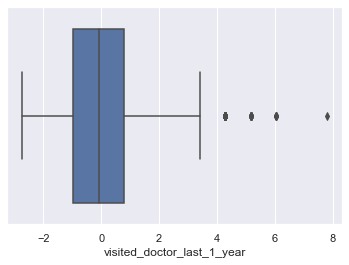

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


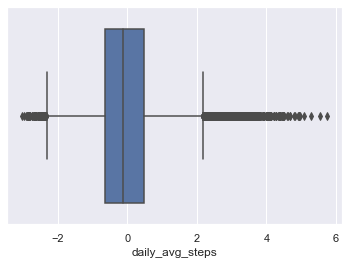

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


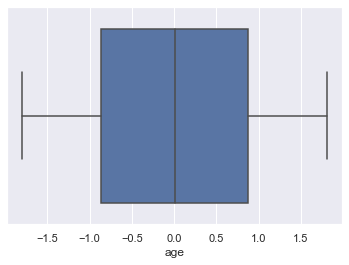

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


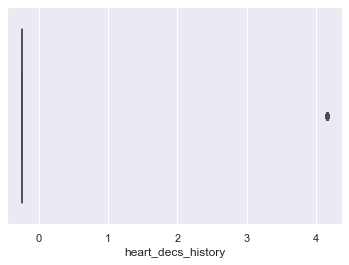

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


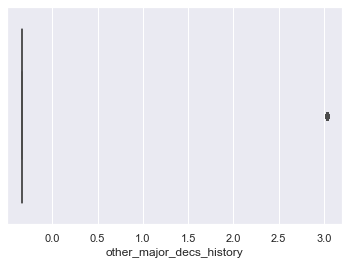

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


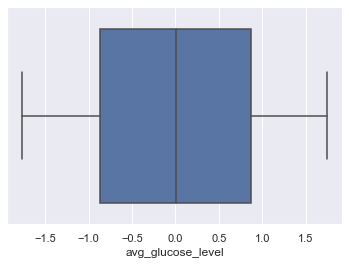

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


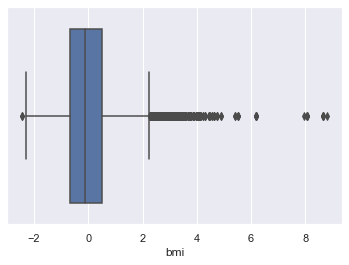

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


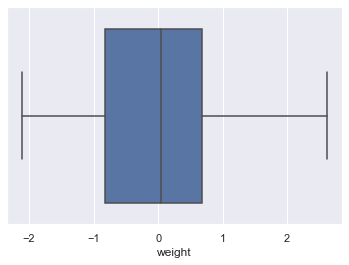

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


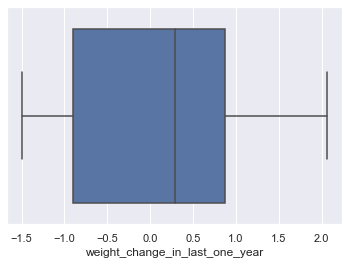

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


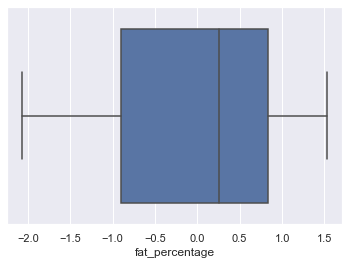

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


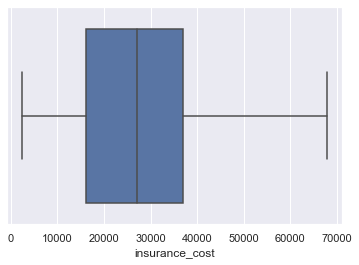

In [113]:
#Checking for outliers

cols = ['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports','visited_doctor_last_1_year',
        'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'avg_glucose_level', 'bmi',
        'weight',
        'weight_change_in_last_one_year',
       'fat_percentage','insurance_cost']
for i in cols:
    sns.boxplot(d1_imputed[i],whis=1.5)
    plt.show();

In [114]:
### Outlier treatment :
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [115]:
for column in d1_imputed[cols].columns:
    lr,ur=remove_outlier(d1_imputed[column])
    d1_imputed[column]=np.where(d1_imputed[column]>ur,ur,d1_imputed[column])
    d1_imputed[column]=np.where(d1_imputed[column]<lr,lr,d1_imputed[column])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


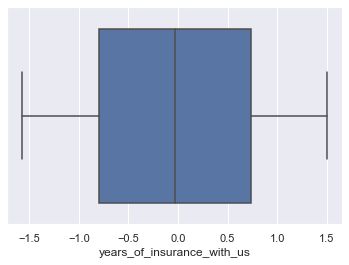

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


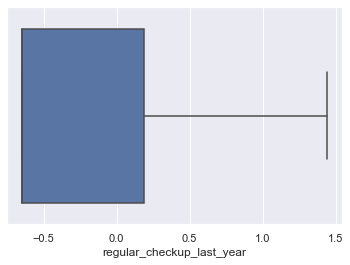

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


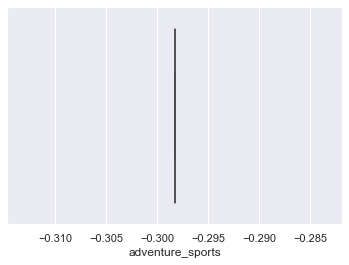

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


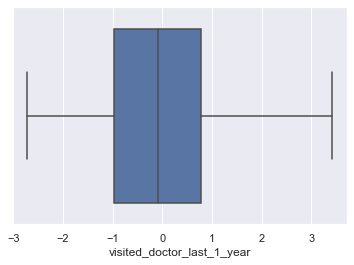

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


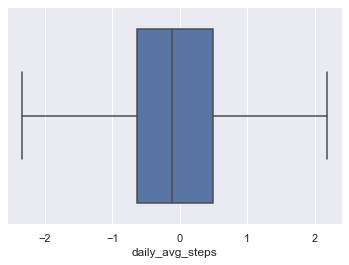

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


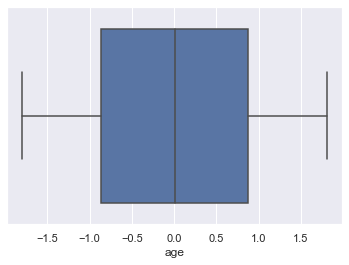

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


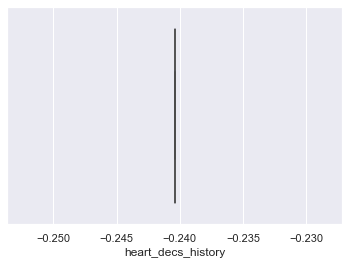

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


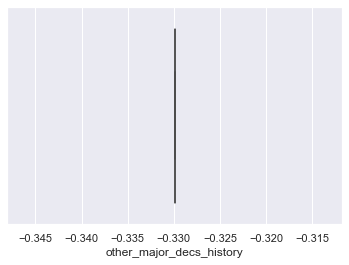

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


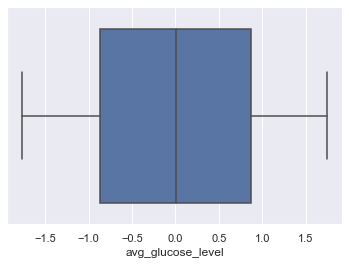

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


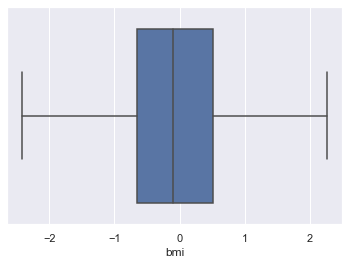

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


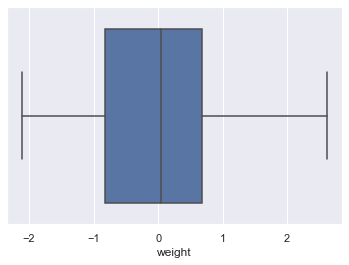

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


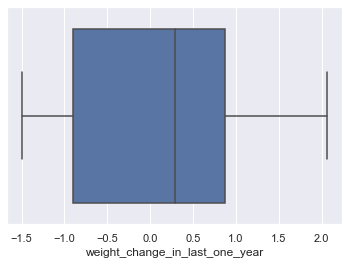

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


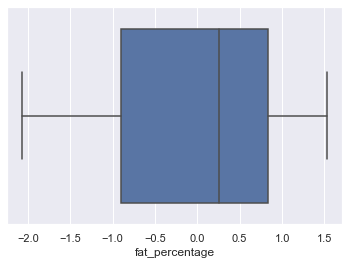

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


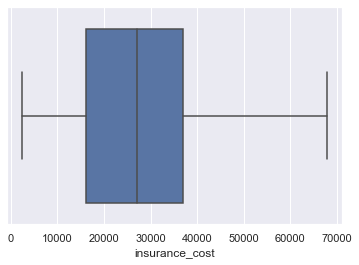

In [116]:
cols = ['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports','visited_doctor_last_1_year',
        'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'avg_glucose_level', 'bmi',
        'weight',
        'weight_change_in_last_one_year',
       'fat_percentage','insurance_cost' ]
for i in cols:
    sns.boxplot(d1_imputed[i],whis=1.5)
    plt.show();

In [117]:
#Variable transformation

In [118]:
 #Input dataset
X_log = np.log(d1_imputed['age'].values.reshape(-1,1))
X1_log = np.log(d1_imputed['bmi'].values.reshape(-1,1))
X2_log = np.log(d1_imputed['daily_avg_steps'].values.reshape(-1,1))
# Output or Predicted Value of data
#y_log = emp_data['Churn_out_rate'].values.reshape(-1,1)

<ipython-input-118-193d2506bbaf>:2: RuntimeWarning: invalid value encountered in log
  X_log = np.log(d1_imputed['age'].values.reshape(-1,1))
<ipython-input-118-193d2506bbaf>:3: RuntimeWarning: invalid value encountered in log
  X1_log = np.log(d1_imputed['bmi'].values.reshape(-1,1))
<ipython-input-118-193d2506bbaf>:4: RuntimeWarning: invalid value encountered in log
  X2_log = np.log(d1_imputed['daily_avg_steps'].values.reshape(-1,1))


In [119]:
X1_log 

array([[        nan],
       [-1.0318677 ],
       [ 0.13409844],
       ...,
       [-0.79223421],
       [        nan],
       [ 0.25917443]])

In [120]:
X_log

array([[        nan],
       [-1.1536226 ],
       [ 0.35977471],
       ...,
       [        nan],
       [        nan],
       [        nan]])

In [121]:
X2_log

array([[        nan],
       [ 0.12644488],
       [        nan],
       ...,
       [-0.94801079],
       [ 0.77876927],
       [-0.45809336]])

In [122]:
#Addition of new variables

In [123]:
#Checking for unbalanced data using unique count

In [124]:
for column in d1[['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'Occupation', 'visited_doctor_last_1_year',
       'cholesterol_level', 'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'Gender', 'avg_glucose_level', 'bmi',
       'smoking_status', 'Location', 'weight', 'covered_by_any_other_company',
       'Alcohol', 'exercise', 'weight_change_in_last_one_year',
       'fat_percentage', 'insurance_cost'] ]:
    print(column.upper(),': ',d1[column].nunique())
    print(d1[column].value_counts().sort_values())
    print('\n')

YEARS_OF_INSURANCE_WITH_US :  9
2    1808
6    2804
4    2846
1    2856
7    2873
0    2912
5    2941
8    2970
3    2990
Name: years_of_insurance_with_us, dtype: int64


REGULAR_CHECKUP_LAST_YEAR :  6
5      348
4      777
3     1818
2     2198
1     4644
0    15215
Name: regular_checkup_last_year, dtype: int64


ADVENTURE_SPORTS :  2
1     2043
0    22957
Name: adventure_sports, dtype: int64


OCCUPATION :  3
Salaried     4811
Business    10020
Student     10169
Name: Occupation, dtype: int64


VISITED_DOCTOR_LAST_1_YEAR :  12
12       1
0        1
10       6
9       13
8       76
7      189
1      432
6      546
5     1265
4     6708
3     7094
2     8669
Name: visited_doctor_last_1_year, dtype: int64


CHOLESTEROL_LEVEL :  5
5    2054
3    2881
4    2963
1    8339
2    8763
Name: cholesterol_level, dtype: int64


DAILY_AVG_STEPS :  4914
10777     1
8680      1
8800      1
3225      1
6822      1
         ..
5017     21
5124     21
5051     22
4993     23
4870     25
Name: daily_avg

In [125]:
#from sklearn.preprocessing import StandardScaler

In [126]:
#X = StandardScaler()

In [127]:
#d1_scaled = X.fit_transform(d1_imputed)

In [128]:
#d1_scaled

In [129]:
#k-means clustering

In [130]:
k_means = KMeans(n_clusters = 2,random_state=1)

In [131]:
k_means.fit(d1_imputed)

KMeans(n_clusters=2, random_state=1)

In [132]:
k_means.inertia_

1632444537855.9756

In [133]:
k_means = KMeans(n_clusters = 3)
k_means.fit(d1_imputed)
k_means.inertia_

787537937074.812

In [134]:
k_means = KMeans(n_clusters = 4)
k_means.fit(d1_imputed)
k_means.inertia_

399964969806.75726

In [135]:
k_means = KMeans(n_clusters = 5)
k_means.fit(d1_imputed)
k_means.inertia_

256594670466.29755

In [136]:
k_means = KMeans(n_clusters = 6)
k_means.fit(d1_imputed)
k_means.inertia_

186426212355.00882

In [137]:
k_means = KMeans(n_clusters = 7)
k_means.fit(d1_imputed)
k_means.inertia_

135575928910.63109

In [138]:
#forming 4 clusters in data

In [139]:
k_means = KMeans(n_clusters = 3)
k_means.fit(d1_imputed)
labels = k_means.labels_

In [140]:
clus_df= d1.copy()

In [141]:
clus_df["clusters"] = labels
clus_df.head().T

,0,1,2,3,4
years_of_insurance_with_us,3,0,1,7,3
regular_checkup_last_year,1,0,0,4,1
adventure_sports,1,0,0,0,0
Occupation,Salaried,Student,Business,Business,Student
visited_doctor_last_1_year,2,4,4,2,2
cholesterol_level,1,2,4,3,2
daily_avg_steps,4866,6411,4509,6214,4938
age,28,50,68,51,44
heart_decs_history,1,0,0,0,0
other_major_decs_history,0,0,0,0,1


In [142]:
clus_df.clusters.value_counts().sort_index()

0    10074
1    11296
2     3630
Name: clusters, dtype: int64

In [143]:
#clust_profile=d1.drop(['applicant_id'],axis=1)
clust_profile=clus_df.copy()
clust_profile=clust_profile.groupby('clusters').mean()
clust_profile['freq']=clus_df.clusters.value_counts().sort_index()
clust_profile

,years_of_insurance_with_us,regular_checkup_last_year,adventure_sports,visited_doctor_last_1_year,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost,freq
clusters,,,,,,,,,,,,,,,
0,4.088346,0.962875,0.058070,3.096784,5215.854973,44.870955,0.054993,0.100556,168.192079,31.441711,62.440242,3.171729,28.892992,12971.821719,10074
1,4.108268,0.741501,0.095963,3.104993,5221.095343,44.830205,0.054178,0.096406,167.058339,31.409483,75.198920,2.098619,28.796654,32186.250708,11296
2,4.031129,0.348760,0.103030,3.122314,5199.784298,45.323967,0.055096,0.096970,167.160331,31.209161,85.893113,2.008540,28.636915,50807.485399,3630


In [144]:
clust_profile.T

clusters,0,1,2
years_of_insurance_with_us,4.088346,4.108268,4.031129
regular_checkup_last_year,0.962875,0.741501,0.348760
adventure_sports,0.058070,0.095963,0.103030
visited_doctor_last_1_year,3.096784,3.104993,3.122314
daily_avg_steps,5215.854973,5221.095343,5199.784298
age,44.870955,44.830205,45.323967
heart_decs_history,0.054993,0.054178,0.055096
other_major_decs_history,0.100556,0.096406,0.096970
avg_glucose_level,168.192079,167.058339,167.160331
bmi,31.441711,31.409483,31.209161


<b>1). Model building and interpretation</b>


<b>Splitting data into train and test</b>

In [145]:
#d1-           -       initial dataset
#d1_new-       -       encoded dataset
#predictors    -       d1_new without insurance_cost 
#response      -       d1_new with only insurance_cost
#d2            =       d1_new(concatenation of predictors and response)
#d1_imputed    -       scaled and imputed new dataset of d2/d1_new

In [146]:
d1_imputed.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'cholesterol_level',
       'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'avg_glucose_level', 'bmi', 'Location',
       'weight', 'weight_change_in_last_one_year', 'fat_percentage',
       'Occupation_Salaried', 'Occupation_Student', 'Gender_Male',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'covered_by_any_other_company_Y', 'Alcohol_No',
       'Alcohol_Rare', 'exercise_Moderate', 'exercise_No', 'insurance_cost'],
      dtype='object')

In [147]:
d1_imputed.rename(columns = {'smoking_status_formerly smoked' : 'smoking_status_formerly_smoked', 'smoking_status_never smoked' : 'smoking_status_never_smoked'}, inplace = True)

In [148]:
#d1_new=pd.DataFrame(scaler.inverse_transform(d1_imputed),columns=d1_imputed.columns)
#d1_new

In [149]:
# Copy all the predictor variables into X dataframe
X = d1_imputed.drop('insurance_cost', axis=1)

# Copy target into the y dataframe.  
y = d1_imputed['insurance_cost']

In [150]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

<b>a. Build various models (You can choose to build models for either or all of descriptive, predictive or prescriptive purposes)</b>

<b>a.Linear Regression</b>

In [151]:
# invoke the LinearRegression function and find the bestfit model on training data

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#,mean_absolute_percentage_error
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [152]:
regression_model.coef_

array([-3.41084563e+01, -7.47533681e+02, -1.81898940e-12, -3.98162063e+01,
        3.45176453e+01, -3.29560644e+01,  4.50235509e+01, -1.13686838e-12,
        2.27373675e-12,  2.26769154e+01, -2.16714642e+00, -5.69642200e+00,
        1.38896175e+04,  2.90479767e+02, -3.03178012e+00,  3.73355007e+01,
        4.00538237e+01,  2.54932326e+01, -1.67051301e+01,  9.44873041e+00,
       -1.58897583e+01,  5.55808565e+02, -1.10979897e+01, -1.30718530e+00,
        7.02633538e+00,  2.72766688e+00])

In [153]:
# Let us explore the coefficients for each of the independent attributes

#for idx, col_name in enumerate(X_train.columns):
 #   print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In [154]:
regression_model.intercept_

27005.87530413305

In [155]:
# Let us check the intercept for the model

#intercept = regression_model.intercept_[0]

#print("The intercept for our model is {}".format(intercept))

print("The intercept for our model is {}".format(regression_model.intercept_))

The intercept for our model is 27005.87530413305


In [156]:
# R square on training data
r_sqr=regression_model.score(X_train, y_train)
print("R square on training data is",r_sqr)

R square on training data is 0.9446885531208044


<b>94% of the variation in the insurance_cost is explained by the predictors in the model for train set</b>

In [157]:
#Root Mean Squared Error - RMSE
#print("Root Mean Squared Error - RMSE:",np.sqrt(mse))

In [158]:
#LR_MAPE= MAPE(y_test,ytest_predict)
#print("MAPE:",LR_MAPE)

In [159]:
#from sklearn.metrics import mean_absolute_percentage_error
#mape=mean_absolute_percentage_error(y_test, ytest_predict)
#print("MAPE:",mape)

In [160]:
# R square on training data
r_sqr=regression_model.score(X_train, y_train)
print("R square on training data is",r_sqr)
# R square on testing data
r_sqr=regression_model.score(X_test, y_test)
print("R square on testing data is",r_sqr)



# adjusted R-squared on training data
adjr =1 - ( 1-regression_model.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y) - X_train.shape[1] - 1 )
print("Adj R-squared of the train data set is",adjr)
# adjusted R-squared
adjr =1 - ( 1-regression_model.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y) - X_test.shape[1] - 1 )
print("Adj R-squared of the test data set is",adjr)
# adjusted R-squared on entire data
adjr =1 - ( 1-regression_model.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print("Adj R-squared of the entire given dataset is",adjr)

#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
rmse=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("RMSE on training data is",rmse)
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("RMSE on testing data is",rmse)



#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#MAPE on Training data
ytrain_predict = regression_model.predict(X_train) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the train data is ",MAPE(y_train,ytrain_predict))

#Defining MAPE function
#def MAPE(Y_actual,Y_Predicted):
 #   mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
 #   return mape

#MAPE on Testing data
ytest_predict = regression_model.predict(X_test) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the test data is ",MAPE(y_test,ytest_predict))


R square on training data is 0.9446885531208044
R square on testing data is 0.9449027282777696
Adj R-squared of the train data set is 0.9612423413711191
Adj R-squared of the test data set is 0.9834551539404555
Adj R-squared of the entire given dataset is 0.9446949726649996
RMSE on training data is 3379.4296627114077
RMSE on testing data is 3336.761927511631
MAPE on the train data is  15.351883993474166
MAPE on the test data is  15.098329848623413


<b>TABLE 1</b>

In [163]:
#Model score and Deduction for each Model in a DataFrame
LR1_trscore=r2_score(y_train,predicted_train)
LR1_trRMSE=np.sqrt(mean_squared_error(y_train,predicted_train))
LR1_trMSE=mean_squared_error(y_train,predicted_train)
LR1_trMAE=mean_absolute_error(y_train,predicted_train)
LR1_trainMAPE=mean_absolute_percentage_error(y_train, ytrain_predict)
#LR1_trMAPE=MAPE(y_train,ytrain_predict)
#LR1_tradjrsq=adjr

LR1_vlscore=r2_score(y_test,predicted_test)
LR1_vlRMSE=np.sqrt(mean_squared_error(y_test,predicted_test))
LR1_vlMSE=mean_squared_error(y_test,predicted_test)
LR1_vlMAE=mean_absolute_error(y_test,predicted_test)
LR1_testMAPE=mean_absolute_percentage_error(y_test, ytest_predict)
#LR1_trMAPE=MAPE(y_test,ytest_predict)
#LR1_tradjrsq=adjr

metrics_df=pd.DataFrame({'Method':['Linear Reg Model1'],'Test Score':LR1_vlscore,'RMSE_test': LR1_vlRMSE, 'MSE_test': LR1_vlMSE, 'MAE_test': LR1_vlMAE,'MAPE_test':LR1_testMAPE,'Train Score':LR1_trscore,'RMSE_train': LR1_trRMSE, 'MSE_train': LR1_trMSE, 'MAE_train': LR1_trMAE,'MAPE_train':LR1_trainMAPE})


metrics_df.T

,0
Method,Linear Reg Model1
Test Score,0.944903
RMSE_test,3336.761928
MSE_test,11133980.160891
MAE_test,2709.810029
MAPE_test,0.150983
Train Score,0.944689
RMSE_train,3379.429663
MSE_train,11420544.845214
MAE_train,2723.059029


<b>Linear regression using Stats model</b>

In [157]:
#Stats model is done by concatenating both the X and y datasets

In [158]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,years_of_insurance_with_us,regular_checkup_last_year,adventure_sports,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,Location,weight,weight_change_in_last_one_year,fat_percentage,Occupation_Salaried,Occupation_Student,Gender_Male,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,covered_by_any_other_company_Y,Alcohol_No,Alcohol_Rare,exercise_Moderate,exercise_No,insurance_cost
4289,-1.568750,1.022424,-0.298316,0.784661,2.0,0.027641,0.005071,-0.240412,-0.329915,-0.598293,0.508695,-1.179813,0.256249,-0.898041,-0.557480,-0.488158,1.207664,0.722737,-0.457628,-0.766290,2.337725,-0.659770,-0.720365,0.904388,0.841358,-0.507115,28382.0
19621,0.733135,1.022424,-0.298316,-0.091272,5.0,2.178789,0.936333,-0.240412,-0.329915,1.330656,-0.037241,1.136471,-0.494422,0.285180,1.296044,2.048518,-0.828045,0.722737,-0.457628,-0.766290,-0.427766,1.515679,-0.720365,0.904388,0.841358,-0.507115,23446.0
14965,0.733135,-0.645043,-0.298316,0.784661,2.0,0.581214,-0.243266,-0.240412,-0.329915,-1.602622,-0.536202,-1.411442,1.221397,0.876791,-0.905015,-0.488158,-0.828045,0.722737,-0.457628,-0.766290,2.337725,-0.659770,-0.720365,0.904388,0.841358,-0.507115,46892.0
12321,0.733135,0.188690,-0.298316,-0.091272,1.0,-0.714887,0.625913,-0.240412,-0.329915,1.521957,0.165898,-0.948185,1.328635,0.876791,-1.947622,2.048518,-0.828045,0.722737,2.185179,-0.766290,-0.427766,-0.659770,1.388185,-1.105720,0.841358,-0.507115,40722.0
6269,-0.034160,1.439290,-0.298316,-0.091272,2.0,2.178789,-1.236612,-0.240412,-0.329915,-0.327284,0.826100,-1.643070,0.792442,-1.489652,0.832663,-0.488158,-0.828045,0.722737,-0.457628,1.304988,-0.427766,-0.659770,-0.720365,0.904388,0.841358,-0.507115,32084.0


In [159]:
data_train.shape

(17500, 27)

In [179]:
data_train.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'cholesterol_level',
       'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'avg_glucose_level', 'bmi', 'Location',
       'weight', 'weight_change_in_last_one_year', 'fat_percentage',
       'Occupation_Salaried', 'Occupation_Student', 'Gender_Male',
       'smoking_status_formerly_smoked', 'smoking_status_never_smoked',
       'smoking_status_smokes', 'covered_by_any_other_company_Y', 'Alcohol_No',
       'Alcohol_Rare', 'exercise_Moderate', 'exercise_No', 'insurance_cost'],
      dtype='object')

In [161]:
data_test.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'cholesterol_level',
       'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'avg_glucose_level', 'bmi', 'Location',
       'weight', 'weight_change_in_last_one_year', 'fat_percentage',
       'Occupation_Salaried', 'Occupation_Student', 'Gender_Male',
       'smoking_status_formerly_smoked', 'smoking_status_never_smoked',
       'smoking_status_smokes', 'covered_by_any_other_company_Y', 'Alcohol_No',
       'Alcohol_Rare', 'exercise_Moderate', 'exercise_No', 'insurance_cost'],
      dtype='object')

In [162]:
#first iteration
expr= 'insurance_cost ~ years_of_insurance_with_us + regular_checkup_last_year + adventure_sports+visited_doctor_last_1_year +cholesterol_level + daily_avg_steps + age + heart_decs_history  + other_major_decs_history + avg_glucose_level + bmi+Location+weight+weight_change_in_last_one_year+fat_percentage+Occupation_Salaried+Occupation_Student+Gender_Male+smoking_status_formerly_smoked+smoking_status_never_smoked+smoking_status_smokes+covered_by_any_other_company_Y+Alcohol_No+Alcohol_Rare+exercise_Moderate+exercise_No '

In [163]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                        -3.161951e+12
years_of_insurance_with_us       -3.431066e+01
regular_checkup_last_year        -7.473960e+02
adventure_sports                  1.408073e+15
visited_doctor_last_1_year       -3.966963e+01
cholesterol_level                 3.454494e+01
daily_avg_steps                  -3.282264e+01
age                               4.478411e+01
heart_decs_history               -8.467640e+14
other_major_decs_history         -6.657470e+14
avg_glucose_level                 2.239953e+01
bmi                              -2.939795e+00
Location                         -6.354960e+00
weight                            1.388981e+04
weight_change_in_last_one_year    2.905804e+02
fat_percentage                   -2.978069e+00
Occupation_Salaried               3.716617e+01
Occupation_Student                4.013217e+01
Gender_Male                       2.590012e+01
smoking_status_formerly_smoked   -1.676883e+01
smoking_status_never_smoked       9.511688e+00
smoking_statu

In [164]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.298e+04
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:51:49   Log-Likelihood:            -1.6703e+05
No. Observations:               17500   AIC:                         3.341e+05
Df Residuals:                   17476   BIC:                         3.343e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [172]:
# Calculate MSE
mse1 = np.mean((lm1.predict(data_train.drop('insurance_cost',axis=1))-data_train['insurance_cost'])**2)

#Root Mean Squared Error - RMSE
print('RMSE on train data:',np.sqrt(mse1))

# Calculate MSE
mse2 = np.mean((lm1.predict(data_test.drop('insurance_cost',axis=1))-data_test['insurance_cost'])**2)

#Root Mean Squared Error - RMSE
print('RMSE on test data:',np.sqrt(mse2))

RMSE on train data: 3379.750131512583
RMSE on test data: 3337.614772410217


In [1254]:
# Calculate MSE
mse1 = np.mean((lm1.predict(data_train.drop('insurance_cost',axis=1))-data_train['insurance_cost'])**2)

#Root Mean Squared Error - RMSE
print('RMSE on train data:',np.sqrt(mse1))

RMSE on train data: 3379.750131512583


In [1255]:
# Calculate MSE
mse2 = np.mean((lm1.predict(data_test.drop('insurance_cost',axis=1))-data_test['insurance_cost'])**2)

#Root Mean Squared Error - RMSE
print('RMSE on test data:',np.sqrt(mse2))

RMSE on test data: 3337.614772410217


In [1256]:
np.sqrt(lm1.mse_resid) #another way

3381.8765510009353

In [1257]:
# Prediction on Test data
y_pred = lm1.predict(data_test)


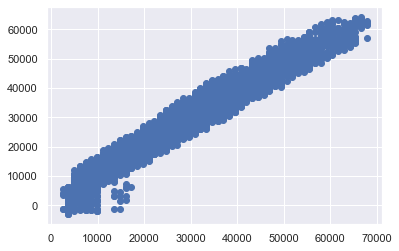

In [1258]:
plt.scatter(data_test['insurance_cost'], y_pred)
plt.show()

In [1259]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(78659854044308.17) * Intercept + (-34.16) * years_of_insurance_with_us + (-747.54) * regular_checkup_last_year + (1884695448991032.8) * adventure_sports + (-40.08) * visited_doctor_last_1_year + (34.83) * cholesterol_level + (-32.9) * daily_avg_steps + (45.35) * age + (-1000604380180430.4) * heart_decs_history + (-736605348711226.1) * other_major_decs_history + (22.89) * avg_glucose_level + (-2.1) * bmi + (-6.15) * Location + (13889.43) * weight + (290.48) * weight_change_in_last_one_year + (-2.96) * fat_percentage + (37.15) * Occupation_Salaried + (40.92) * Occupation_Student + (25.22) * Gender_Male + (-16.44) * smoking_status_formerly_smoked + (9.67) * smoking_status_never_smoked + (-15.75) * smoking_status_smokes + (555.5) * covered_by_any_other_company_Y + (-9.84) * Alcohol_No + (5.14) * exercise_Moderate + 

<b>VARIABLE INFLATION FACTOR</b>

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = [variance_inflation_factor(d1_imputed.values, ix) for ix in range(X.shape[1])] 

In [ ]:
i=0
for column in d1_imputed.columns:
    if i < 25:
        print (column ,"--->",  vif[i])
        i = i+1



<b>Regularization</b>

<b>Lasso Regression</b>

In [240]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [241]:
Lasso1 = Lasso(alpha=1)
Lasso1.fit(X_train, y_train)

Lasso(alpha=1)

In [242]:
yLasso1_predtrain= Lasso1.predict(X_train)
yLasso1_predtest= Lasso1.predict(X_test)

Lasso1.coef_

array([-3.28076521e+01, -7.46138286e+02, -0.00000000e+00, -3.86004531e+01,
        3.28666951e+01, -3.12714888e+01,  4.39958014e+01,  0.00000000e+00,
        0.00000000e+00,  2.16417633e+01, -5.01768472e-01, -4.77025725e+00,
        1.38882348e+04,  2.88897255e+02, -2.22676398e+00,  3.58182308e+01,
        3.75265262e+01,  2.35673557e+01, -1.52485076e+01,  9.52217875e+00,
       -1.45550554e+01,  5.54434559e+02, -9.16311552e+00,  0.00000000e+00,
        4.40688881e+00,  1.15301718e-02])

In [243]:
# R square on training data
r_sqr=Lasso1.score(X_train, y_train)
print("R square on training data is",r_sqr)
# R square on testing data
r_sqr=Lasso1.score(X_test, y_test)
print("R square on testing data is",r_sqr)



# adjusted R-squared on training data
adjr =1 - ( 1-Lasso1.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y) - X_train.shape[1] - 1 )
print("Adj R-squared of the train data set is",adjr)
# adjusted R-squared
adjr =1 - ( 1-Lasso1.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y) - X_test.shape[1] - 1 )
print("Adj R-squared of the test data set is",adjr)
# adjusted R-squared on entire data
adjr =1 - ( 1-Lasso1.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print("Adj R-squared of the entire given dataset is",adjr)

#RMSE on Training data
predicted_train=Lasso1.fit(X_train, y_train).predict(X_train)
rmse=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("RMSE on training data is",rmse)
#RMSE on Testing data
predicted_test=Lasso1.fit(X_train, y_train).predict(X_test)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("RMSE on testing data is",rmse)



#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#MAPE on Training data
ytrain_predict = Lasso1.predict(X_train) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the train data is ",MAPE(y_train,ytrain_predict))

#Defining MAPE function
#def MAPE(Y_actual,Y_Predicted):
 #   mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
 #   return mape

#MAPE on Testing data
ytest_predict = Lasso1.predict(X_test) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the test data is ",MAPE(y_test,ytest_predict))


R square on training data is 0.9446883943668088
R square on testing data is 0.9449067063162204
Adj R-squared of the train data set is 0.9612422301295314
Adj R-squared of the test data set is 0.9834563484829751
Adj R-squared of the entire given dataset is 0.9446960374186542
RMSE on training data is 3379.434512499354
RMSE on testing data is 3336.641467764397
MAPE on the train data is  15.351628419756311
MAPE on the test data is  15.09704707864297


In [244]:
Lasso1_trainscore=r2_score(y_train,yLasso1_predtrain)
Lasso1_trainRMSE=np.sqrt(mean_squared_error(y_train, yLasso1_predtrain))
Lasso1_trainMSE=mean_squared_error(y_train, yLasso1_predtrain)
Lasso1_trainMAE=mean_absolute_error(y_train, yLasso1_predtrain)
Lasso1_trainMAPE=mean_absolute_percentage_error(y_train, ytrain_predict)

Lasso1_testscore=r2_score(y_test,yLasso1_predtest)
Lasso1_testRMSE=np.sqrt(mean_squared_error(y_test, yLasso1_predtest))
Lasso1_testMSE=mean_squared_error(y_test, yLasso1_predtest)
Lasso1_testMAE=mean_absolute_error(y_test, yLasso1_predtest)
Lasso1_testMAPE=mean_absolute_percentage_error(y_test, ytest_predict)

Lasso1_df=pd.DataFrame({'Method':['Linear-Reg Lasso1'],'Test Score':Lasso1_testscore,'RMSE_test': Lasso1_testRMSE, 'MSE_test': Lasso1_testMSE, 'MAE_test': Lasso1_testMAE,'MAPE_test':Lasso1_testMAPE,'Train Score':Lasso1_trainscore,'RMSE_train': Lasso1_trainRMSE, 'MSE_train': Lasso1_trainMSE, 'MAE_train': Lasso1_trainMAE,'MAPE_train':Lasso1_trainMAPE})
metrics_df = pd.concat([metrics_df, Lasso1_df])

metrics_df

,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.944903,3336.761928,1.113398e+07,2709.810029,0.150983,0.944689,3379.429663,1.142054e+07,2723.059029,0.153519
0,RF1 before Grid Search,0.951042,3145.357263,9.893272e+06,2517.596928,0.123976,0.993104,1193.250527,1.423847e+06,936.844338,0.046053
0,DT1 before Grid Search,0.906375,4349.658915,1.891953e+07,3397.942400,0.165102,1.000000,0.000000,0.000000e+00,0.000000,0.000000
0,MLP before Grid Search,0.951591,3127.687546,9.782429e+06,2542.985586,0.128407,0.955291,3038.312529,9.231343e+06,2461.060454,0.122775
0,Gradient Boosting,0.954267,3039.994346,9.241566e+06,2461.314211,0.124558,0.955717,3023.806428,9.143405e+06,2442.156816,0.123831
0,ADA Boosting,0.947925,3243.969513,1.052334e+07,2625.982903,0.141181,0.949083,3242.414416,1.051325e+07,2622.873122,0.140822
0,Bagging on DT,0.947581,3254.663245,1.059283e+07,2590.560880,0.127773,0.991058,1358.781697,1.846288e+06,1012.056286,0.049809
0,Bagging on RF,0.953042,3080.467650,9.489281e+06,2482.490451,0.127773,0.983115,1867.186707,3.486386e+06,1484.923464,0.073441
0,RF1 after Grid Search,0.919279,4038.806655,1.631196e+07,3186.608824,0.123976,0.927880,3858.889772,1.489103e+07,3043.087244,0.177997
0,DT1 after Grid Search,0.952167,3109.032036,9.666080e+06,2496.254799,0.122062,0.956368,3001.510854,9.009067e+06,2411.846323,0.118645


<b>Ridge Regression</b>

In [245]:
Ridge1 = Ridge(alpha=0.5)
Ridge1.fit(X_train, y_train)

Ridge(alpha=0.5)

In [246]:
#predicting result over test data
yRidge1_predtrain= Ridge1.predict(X_train)
yRidge1_predtest= Ridge1.predict(X_test)

Ridge1.coef_

array([-3.41138229e+01, -7.47588015e+02,  1.16333146e-23, -3.98092701e+01,
        3.45143904e+01, -3.29539622e+01,  4.50198742e+01,  1.43673950e-25,
        0.00000000e+00,  2.26732457e+01, -2.16629395e+00, -5.69322955e+00,
        1.38891467e+04,  2.90294870e+02, -3.03473506e+00,  3.73258216e+01,
        4.00476299e+01,  2.54935583e+01, -1.67069354e+01,  9.44690923e+00,
       -1.58921023e+01,  5.55816877e+02, -1.10939514e+01, -1.30248944e+00,
        7.02739673e+00,  2.72120273e+00])

In [247]:
# R square on training data
r_sqr=Ridge1.score(X_train, y_train)
print("R square on training data is",r_sqr)
# R square on testing data
r_sqr=Ridge1.score(X_test, y_test)
print("R square on testing data is",r_sqr)



# adjusted R-squared on training data
adjr =1 - ( 1-Ridge1.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y) - X_train.shape[1] - 1 )
print("Adj R-squared of the train data set is",adjr)
# adjusted R-squared
adjr =1 - ( 1-Ridge1.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y) - X_test.shape[1] - 1 )
print("Adj R-squared of the test data set is",adjr)
# adjusted R-squared on entire data
adjr =1 - ( 1-Ridge1.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print("Adj R-squared of the entire given dataset is",adjr)

#RMSE on Training data
predicted_train=Ridge1.fit(X_train, y_train).predict(X_train)
rmse=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("RMSE on training data is",rmse)
#RMSE on Testing data
predicted_test=Ridge1.fit(X_train, y_train).predict(X_test)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("RMSE on testing data is",rmse)



#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#MAPE on Training data
ytrain_predict = Ridge1.predict(X_train) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the train data is ",MAPE(y_train,ytrain_predict))

#Defining MAPE function
#def MAPE(Y_actual,Y_Predicted):
 #   mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
 #   return mape

#MAPE on Testing data
ytest_predict = Ridge1.predict(X_test) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the test data is ",MAPE(y_test,ytest_predict))


R square on training data is 0.9446885522145789
R square on testing data is 0.9449029323657311
Adj R-squared of the train data set is 0.9612423407361117
Adj R-squared of the test data set is 0.9834552152248676
Adj R-squared of the entire given dataset is 0.944695032395511
RMSE on training data is 3379.429690395778
RMSE on testing data is 3336.755747590655
MAPE on the train data is  15.351710945880223
MAPE on the test data is  15.09813858034832


In [249]:
Ridge1_trainscore=r2_score(y_train,yRidge1_predtrain)
Ridge1_trainRMSE=np.sqrt(mean_squared_error(y_train, yRidge1_predtrain))
Ridge1_trainMSE=mean_squared_error(y_train, yRidge1_predtrain)
Ridge1_trainMAE=mean_absolute_error(y_train, yRidge1_predtrain)
Ridge1_trainMAPE=mean_absolute_percentage_error(y_train, ytrain_predict)

Ridge1_testscore=r2_score(y_test,yRidge1_predtest)
Ridge1_testRMSE=np.sqrt(mean_squared_error(y_test, yRidge1_predtest))
Ridge1_testMSE=mean_squared_error(y_test, yRidge1_predtest)
Ridge1_testMAE=mean_absolute_error(y_test, yRidge1_predtest)
Ridge1_testMAPE=mean_absolute_percentage_error(y_test, ytest_predict)

Ridge1_df=pd.DataFrame({'Method':['Linear-Reg Ridge1'],'Test Score':Ridge1_testscore,'RMSE_test': Ridge1_testRMSE, 'MSE_test': Ridge1_testMSE, 'MAE_test': Ridge1_testMAE,'MAPE_test':Ridge1_testMAPE,'Train Score':Ridge1_trainscore,'RMSE_train': Ridge1_trainRMSE, 'MSE_train': Ridge1_trainMSE, 'MAE_train': Ridge1_trainMAE,'MAPE_train':Ridge1_trainMAPE})
metrics_df = pd.concat([metrics_df, Ridge1_df])

metrics_df

,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.944903,3336.761928,1.113398e+07,2709.810029,0.150983,0.944689,3379.429663,1.142054e+07,2723.059029,0.153519
0,RF1 before Grid Search,0.951042,3145.357263,9.893272e+06,2517.596928,0.123976,0.993104,1193.250527,1.423847e+06,936.844338,0.046053
0,DT1 before Grid Search,0.906375,4349.658915,1.891953e+07,3397.942400,0.165102,1.000000,0.000000,0.000000e+00,0.000000,0.000000
0,MLP before Grid Search,0.951591,3127.687546,9.782429e+06,2542.985586,0.128407,0.955291,3038.312529,9.231343e+06,2461.060454,0.122775
0,Gradient Boosting,0.954267,3039.994346,9.241566e+06,2461.314211,0.124558,0.955717,3023.806428,9.143405e+06,2442.156816,0.123831
0,ADA Boosting,0.947925,3243.969513,1.052334e+07,2625.982903,0.141181,0.949083,3242.414416,1.051325e+07,2622.873122,0.140822
0,Bagging on DT,0.947581,3254.663245,1.059283e+07,2590.560880,0.127773,0.991058,1358.781697,1.846288e+06,1012.056286,0.049809
0,Bagging on RF,0.953042,3080.467650,9.489281e+06,2482.490451,0.127773,0.983115,1867.186707,3.486386e+06,1484.923464,0.073441
0,RF1 after Grid Search,0.919279,4038.806655,1.631196e+07,3186.608824,0.123976,0.927880,3858.889772,1.489103e+07,3043.087244,0.177997
0,DT1 after Grid Search,0.952167,3109.032036,9.666080e+06,2496.254799,0.122062,0.956368,3001.510854,9.009067e+06,2411.846323,0.118645


<b>b.Random Forest Regressor</b>

<b>1. BASE MODEL</b>

In [164]:
from sklearn.ensemble import RandomForestRegressor
rfcl=RandomForestRegressor(n_estimators = 50,random_state=0)

In [165]:
rfcl = rfcl.fit(X_train, y_train)

In [166]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

In [167]:
from sklearn.metrics import r2_score

In [168]:
print("R square on training data is",r2_score(y_train,ytrain_predict))

R square on training data is 0.9931040918973013


In [169]:
print("R square on testing data is",r2_score(y_test,ytest_predict))

R square on testing data is 0.9510424569581692


In [170]:
# R square on training data
r_sqr=rfcl.score(X_train, y_train)
print("R square on training data is",r_sqr)
# R square on testing data
r_sqr=rfcl.score(X_test, y_test)
print("R square on testing data is",r_sqr)



# adjusted R-squared on training data
adjr =1 - ( 1-rfcl.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y) - X_train.shape[1] - 1 )
print("Adj R-squared of the train data set is",adjr)
# adjusted R-squared
adjr =1 - ( 1-rfcl.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y) - X_test.shape[1] - 1 )
print("Adj R-squared of the test data set is",adjr)
# adjusted R-squared on entire data
adjr =1 - ( 1-rfcl.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print("Adj R-squared of the entire given dataset is",adjr)

#RMSE on Training data
predicted_train=rfcl.fit(X_train, y_train).predict(X_train)
rmse=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("RMSE on training data is",rmse)
#RMSE on Testing data
predicted_test=rfcl.fit(X_train, y_train).predict(X_test)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("RMSE on testing data is",rmse)



#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#MAPE on Training data
ytrain_predict = rfcl.predict(X_train) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the train data is ",MAPE(y_train,ytrain_predict))

#Defining MAPE function
#def MAPE(Y_actual,Y_Predicted):
 #   mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
 #   return mape

#MAPE on Testing data
ytest_predict = rfcl.predict(X_test) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the test data is ",MAPE(y_test,ytest_predict))


R square on training data is 0.9931040918973013
R square on testing data is 0.9510424569581692
Adj R-squared of the train data set is 0.9951679215196763
Adj R-squared of the test data set is 0.9852988181127342
Adj R-squared of the entire given dataset is 0.9806550822299901
RMSE on training data is 1193.250526822164
RMSE on testing data is 3145.3572634690304
MAPE on the train data is  4.605284527360889
MAPE on the test data is  12.397636670527852


In [172]:
#Model score and Deduction for each Model in a DataFrame
RF1_trainscore=r2_score(y_train,ytrain_predict)
RF1_trainRMSE=np.sqrt(mean_squared_error(y_train,ytrain_predict))
RF1_trainMSE=mean_squared_error(y_train,ytrain_predict)
RF1_trainMAE=mean_absolute_error(y_train,ytrain_predict)
RF1_trainMAPE=mean_absolute_percentage_error(y_train, ytrain_predict)

RF1_testscore=r2_score(y_test,ytest_predict)
RF1_testRMSE=np.sqrt(mean_squared_error(y_test,ytest_predict))
RF1_testMSE=mean_squared_error(y_test,ytest_predict)
RF1_testMAE=mean_absolute_error(y_test,ytest_predict)
RF1_testMAPE=mean_absolute_percentage_error(y_test, ytest_predict)

RF1_df=pd.DataFrame({'Method':['RF1 before Grid Search'],'Test Score':RF1_testscore,'RMSE_test': RF1_testRMSE, 'MSE_test':RF1_testMSE, 'MAE_test': RF1_testMAE,'MAPE_test':RF1_testMAPE,'Train Score':RF1_trainscore,'RMSE_train': RF1_trainRMSE, 'MSE_train': RF1_trainMSE, 'MAE_train': RF1_trainMAE,'MAPE_train':RF1_trainMAPE})
metrics_df = pd.concat([metrics_df, RF1_df])
metrics_df

,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.944903,3336.761928,1.113398e+07,2709.810029,0.150983,0.944689,3379.429663,1.142054e+07,2723.059029,0.153519
0,RF1 before Grid Search,0.951042,3145.357263,9.893272e+06,2517.596928,0.123976,0.993104,1193.250527,1.423847e+06,936.844338,0.046053


<b>2.Grid search</b>

In [221]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [10,50]
}

rfcl = RandomForestRegressor(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [222]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [10, 50]})

In [223]:
#get best params
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 50}

In [224]:
best_grid = grid_search.best_estimator_

In [225]:
best_grid

RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=5,
                      min_samples_split=50, n_estimators=50, random_state=0)

In [226]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [227]:
print("Model score on train data is",r2_score(y_train,ytrain_predict))

Model score on train data is 0.927880460962985


In [228]:
print("Model score on test data is",r2_score(y_test,ytest_predict))

Model score on test data is 0.9192791404954773


<b>3.DATAFRAME CREATION</b>

In [229]:
#Model score and Deduction for each Model in a DataFrame
RF1_trainscore=r2_score(y_train,ytrain_predict)
RF1_trainRMSE=np.sqrt(mean_squared_error(y_train,ytrain_predict))
RF1_trainMSE=mean_squared_error(y_train,ytrain_predict)
RF1_trainMAE=mean_absolute_error(y_train,ytrain_predict)
RF1_trainMAPE=mean_absolute_percentage_error(y_train, ytrain_predict)

RF1_testscore=r2_score(y_test,ytest_predict)
RF1_testRMSE=np.sqrt(mean_squared_error(y_test,ytest_predict))
RF1_testMSE=mean_squared_error(y_test,ytest_predict)
RF1_testMAE=mean_absolute_error(y_test,ytest_predict)
RF1_trainMAPE=mean_absolute_percentage_error(y_test, ytest_predict)

RF1_df=pd.DataFrame({'Method':['RF1 after Grid Search'],'Test Score':RF1_testscore,'RMSE_test': RF1_testRMSE, 'MSE_test':RF1_testMSE, 'MAE_test': RF1_testMAE,'MAPE_test':RF1_testMAPE,'Train Score':RF1_trainscore,'RMSE_train': RF1_trainRMSE, 'MSE_train': RF1_trainMSE, 'MAE_train': RF1_trainMAE,'MAPE_train':RF1_trainMAPE})
metrics_df = pd.concat([metrics_df, RF1_df])

In [230]:
metrics_df

,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.944903,3336.761928,1.113398e+07,2709.810029,0.150983,0.944689,3379.429663,1.142054e+07,2723.059029,0.153519
0,RF1 before Grid Search,0.951042,3145.357263,9.893272e+06,2517.596928,0.123976,0.993104,1193.250527,1.423847e+06,936.844338,0.046053
0,DT1 before Grid Search,0.906375,4349.658915,1.891953e+07,3397.942400,0.165102,1.000000,0.000000,0.000000e+00,0.000000,0.000000
0,MLP before Grid Search,0.951591,3127.687546,9.782429e+06,2542.985586,0.128407,0.955291,3038.312529,9.231343e+06,2461.060454,0.122775
0,Gradient Boosting,0.954267,3039.994346,9.241566e+06,2461.314211,0.124558,0.955717,3023.806428,9.143405e+06,2442.156816,0.123831
0,ADA Boosting,0.947925,3243.969513,1.052334e+07,2625.982903,0.141181,0.949083,3242.414416,1.051325e+07,2622.873122,0.140822
0,Bagging on DT,0.947581,3254.663245,1.059283e+07,2590.560880,0.127773,0.991058,1358.781697,1.846288e+06,1012.056286,0.049809
0,Bagging on RF,0.953042,3080.467650,9.489281e+06,2482.490451,0.127773,0.983115,1867.186707,3.486386e+06,1484.923464,0.073441
0,RF1 after Grid Search,0.919279,4038.806655,1.631196e+07,3186.608824,0.123976,0.927880,3858.889772,1.489103e+07,3043.087244,0.177997


<b>4.Feature importance</b>

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


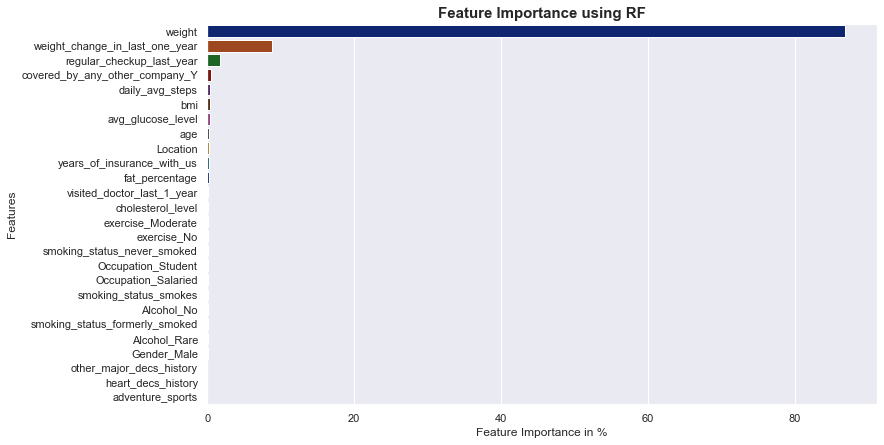

In [378]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF',fontsize=15,fontweight='bold')
plt.show()


In [379]:
print(pd.DataFrame(best_grid.feature_importances_,columns=['Imp'],index=X_train.columns).sort_values('Imp',ascending=False))

                                     Imp
weight                          0.868943
weight_change_in_last_one_year  0.087799
regular_checkup_last_year       0.016522
covered_by_any_other_company_Y  0.005440
daily_avg_steps                 0.003539
bmi                             0.003113
avg_glucose_level               0.002898
age                             0.002370
Location                        0.001811
years_of_insurance_with_us      0.001749
fat_percentage                  0.001591
visited_doctor_last_1_year      0.001036
cholesterol_level               0.000697
exercise_Moderate               0.000371
exercise_No                     0.000279
smoking_status_never_smoked     0.000269
Occupation_Student              0.000265
Occupation_Salaried             0.000240
smoking_status_smokes           0.000238
Alcohol_No                      0.000219
smoking_status_formerly_smoked  0.000219
Alcohol_Rare                    0.000203
Gender_Male                     0.000190
other_major_decs

<b>c.Decision Tree Regressor</b>

<b>1.Base Model</b>

In [173]:
from sklearn.tree import DecisionTreeRegressor

In [174]:
cart=DecisionTreeRegressor(random_state=0)

In [175]:
cart.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [176]:
ytrain_predict = cart.predict(X_train)
ytest_predict = cart.predict(X_test)

In [177]:
from sklearn.metrics import r2_score

In [178]:
r2_score(y_test,ytest_predict)

0.9063753825771563

In [179]:
# R square on training data
r_sqr=cart.score(X_train, y_train)
print("R square on training data is",r_sqr)
# R square on testing data
r_sqr=cart.score(X_test, y_test)
print("R square on testing data is",r_sqr)



# adjusted R-squared on training data
adjr =1 - ( 1-cart.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y) - X_train.shape[1] - 1 )
print("Adj R-squared of the train data set is",adjr)
# adjusted R-squared
adjr =1 - ( 1-cart.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y) - X_test.shape[1] - 1 )
print("Adj R-squared of the test data set is",adjr)
# adjusted R-squared on entire data
adjr =1 - ( 1-cart.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print("Adj R-squared of the entire given dataset is",adjr)

#RMSE on Training data
predicted_train=cart.fit(X_train, y_train).predict(X_train)
rmse=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("RMSE on training data is",rmse)
#RMSE on Testing data
predicted_test=cart.fit(X_train, y_train).predict(X_test)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("RMSE on testing data is",rmse)



#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#MAPE on Training data
ytrain_predict = cart.predict(X_train) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the train data is ",MAPE(y_train,ytrain_predict))

#Defining MAPE function
#def MAPE(Y_actual,Y_Predicted):
 #   mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
 #   return mape

#MAPE on Testing data
ytest_predict = cart.predict(X_test) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the test data is ",MAPE(y_test,ytest_predict))


R square on training data is 1.0
R square on testing data is 0.9063753825771563
Adj R-squared of the train data set is 1.0
Adj R-squared of the test data set is 0.9718859966342087
Adj R-squared of the entire given dataset is 0.9723056603855469
RMSE on training data is 0.0
RMSE on testing data is 4349.658915424672
MAPE on the train data is  0.0
MAPE on the test data is  16.510217438182423


In [183]:
#Model score and Deduction for each Model in a DataFrame
DT1_trainscore=r2_score(y_train,ytrain_predict)
DT1_trainRMSE=np.sqrt(mean_squared_error(y_train,ytrain_predict))
DT1_trainMSE=mean_squared_error(y_train,ytrain_predict)
DT1_trainMAE=mean_absolute_error(y_train,ytrain_predict)
DT1_trainMAPE=mean_absolute_percentage_error(y_train, ytrain_predict)

DT1_testscore=r2_score(y_test,ytest_predict)
DT1_testRMSE=np.sqrt(mean_squared_error(y_test,ytest_predict))
DT1_testMSE=mean_squared_error(y_test,ytest_predict)
DT1_testMAE=mean_absolute_error(y_test,ytest_predict)
DT1_testMAPE=mean_absolute_percentage_error(y_test, ytest_predict)

DT1_df=pd.DataFrame({'Method':['DT1 before Grid Search'],'Test Score':DT1_testscore,'RMSE_test': DT1_testRMSE, 'MSE_test':DT1_testMSE, 'MAE_test': DT1_testMAE,'MAPE_test':DT1_testMAPE,'Train Score':DT1_trainscore,'RMSE_train': DT1_trainRMSE, 'MSE_train': DT1_trainMSE, 'MAE_train': DT1_trainMAE,'MAPE_train':DT1_trainMAPE})
metrics_df = pd.concat([metrics_df, DT1_df])
metrics_df

,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.944903,3336.761928,1.113398e+07,2709.810029,0.150983,0.944689,3379.429663,1.142054e+07,2723.059029,0.153519
0,RF1 before Grid Search,0.951042,3145.357263,9.893272e+06,2517.596928,0.123976,0.993104,1193.250527,1.423847e+06,936.844338,0.046053
0,DT1 before Grid Search,0.906375,4349.658915,1.891953e+07,3397.942400,0.165102,1.000000,0.000000,0.000000e+00,0.000000,0.000000


<b>2.Grid search</b>

In [231]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,6,7,8,9,10],
    'min_samples_leaf': [3,4,5,6,7],
    'min_samples_split': [115,116,117,118,119,120]
}

#param_grid_dtcl = {
    #'criterion': ['gini'],
    #'max_depth': [10,20,30,50],
    #'min_samples_leaf': [50,100,150], 
    #'min_samples_split': [150,300,450],
#}

df_model = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator = df_model, param_grid = param_grid, cv = 3)

In [232]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [3, 4, 5, 6, 7],
                         'min_samples_split': [115, 116, 117, 118, 119, 120]})

In [233]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 120}

In [234]:
best_grid = grid_search.best_estimator_

In [235]:
best_grid

DecisionTreeRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=120)

In [236]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [237]:
print("Model score on train data is",r2_score(y_train,ytrain_predict))
print("Model score on test data is",r2_score(y_test,ytest_predict))

Model score on train data is 0.9563677074990662
Model score on test data is 0.9521667328660832


<b>3.DATAFRAME CREATION</b>

In [238]:
#Model score and Deduction for each Model in a DataFrame
DT1_trainscore=r2_score(y_train,ytrain_predict)
DT1_trainRMSE=np.sqrt(mean_squared_error(y_train,ytrain_predict))
DT1_trainMSE=mean_squared_error(y_train,ytrain_predict)
DT1_trainMAE=mean_absolute_error(y_train,ytrain_predict)
DT1_trainMAPE=mean_absolute_percentage_error(y_train, ytrain_predict)

DT1_testscore=r2_score(y_test,ytest_predict)
DT1_testRMSE=np.sqrt(mean_squared_error(y_test,ytest_predict))
DT1_testMSE=mean_squared_error(y_test,ytest_predict)
DT1_testMAE=mean_absolute_error(y_test,ytest_predict)
DT1_testMAPE=mean_absolute_percentage_error(y_test, ytest_predict)

DT1_df=pd.DataFrame({'Method':['DT1 after Grid Search'],'Test Score':DT1_testscore,'RMSE_test': DT1_testRMSE, 'MSE_test':DT1_testMSE, 'MAE_test': DT1_testMAE,'MAPE_test':DT1_testMAPE,'Train Score':DT1_trainscore,'RMSE_train': DT1_trainRMSE, 'MSE_train': DT1_trainMSE, 'MAE_train': DT1_trainMAE,'MAPE_train':DT1_trainMAPE})
metrics_df = pd.concat([metrics_df, DT1_df])

In [239]:
metrics_df

,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.944903,3336.761928,1.113398e+07,2709.810029,0.150983,0.944689,3379.429663,1.142054e+07,2723.059029,0.153519
0,RF1 before Grid Search,0.951042,3145.357263,9.893272e+06,2517.596928,0.123976,0.993104,1193.250527,1.423847e+06,936.844338,0.046053
0,DT1 before Grid Search,0.906375,4349.658915,1.891953e+07,3397.942400,0.165102,1.000000,0.000000,0.000000e+00,0.000000,0.000000
0,MLP before Grid Search,0.951591,3127.687546,9.782429e+06,2542.985586,0.128407,0.955291,3038.312529,9.231343e+06,2461.060454,0.122775
0,Gradient Boosting,0.954267,3039.994346,9.241566e+06,2461.314211,0.124558,0.955717,3023.806428,9.143405e+06,2442.156816,0.123831
0,ADA Boosting,0.947925,3243.969513,1.052334e+07,2625.982903,0.141181,0.949083,3242.414416,1.051325e+07,2622.873122,0.140822
0,Bagging on DT,0.947581,3254.663245,1.059283e+07,2590.560880,0.127773,0.991058,1358.781697,1.846288e+06,1012.056286,0.049809
0,Bagging on RF,0.953042,3080.467650,9.489281e+06,2482.490451,0.127773,0.983115,1867.186707,3.486386e+06,1484.923464,0.073441
0,RF1 after Grid Search,0.919279,4038.806655,1.631196e+07,3186.608824,0.123976,0.927880,3858.889772,1.489103e+07,3043.087244,0.177997
0,DT1 after Grid Search,0.952167,3109.032036,9.666080e+06,2496.254799,0.122062,0.956368,3001.510854,9.009067e+06,2411.846323,0.118645


<b>4.Feature importance</b>

In [397]:
from sklearn.tree import DecisionTreeRegressor
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeRegressor()
dt_model
dt_model.fit(X_train,y_train)


DecisionTreeRegressor()

In [398]:
dt_model.feature_importances_

array([2.96429393e-03, 2.36702338e-03, 0.00000000e+00, 1.74836512e-03,
       1.26890644e-03, 5.71420011e-03, 5.01447744e-03, 0.00000000e+00,
       0.00000000e+00, 5.52754011e-03, 6.01216658e-03, 3.20694988e-03,
       9.51674194e-01, 2.75663353e-03, 3.91015136e-03, 3.45457237e-04,
       5.16592712e-04, 5.45863375e-04, 5.21497170e-04, 5.76410533e-04,
       5.14505523e-04, 2.49117721e-03, 5.60635740e-04, 5.99938037e-04,
       5.97141472e-04, 5.65878646e-04])

In [399]:
#feature importance before grid search
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                                     Imp
weight                          0.951674
bmi                             0.006012
daily_avg_steps                 0.005714
avg_glucose_level               0.005528
age                             0.005014
fat_percentage                  0.003910
Location                        0.003207
years_of_insurance_with_us      0.002964
weight_change_in_last_one_year  0.002757
covered_by_any_other_company_Y  0.002491
regular_checkup_last_year       0.002367
visited_doctor_last_1_year      0.001748
cholesterol_level               0.001269
Alcohol_Rare                    0.000600
exercise_Moderate               0.000597
smoking_status_never_smoked     0.000576
exercise_No                     0.000566
Alcohol_No                      0.000561
Gender_Male                     0.000546
smoking_status_formerly_smoked  0.000521
Occupation_Student              0.000517
smoking_status_smokes           0.000515
Occupation_Salaried             0.000345
heart_decs_histo

In [400]:
#feature importance after grid search
print(pd.DataFrame(best_grid.feature_importances_,columns=['Imp'],index=X_train.columns).sort_values('Imp',ascending=False))

                                     Imp
weight                          0.994494
covered_by_any_other_company_Y  0.002360
regular_checkup_last_year       0.001401
weight_change_in_last_one_year  0.000648
years_of_insurance_with_us      0.000340
avg_glucose_level               0.000176
bmi                             0.000157
age                             0.000141
fat_percentage                  0.000079
daily_avg_steps                 0.000076
Location                        0.000042
smoking_status_never_smoked     0.000037
cholesterol_level               0.000031
Alcohol_No                      0.000016
exercise_Moderate               0.000000
Alcohol_Rare                    0.000000
adventure_sports                0.000000
smoking_status_smokes           0.000000
Occupation_Salaried             0.000000
smoking_status_formerly_smoked  0.000000
Gender_Male                     0.000000
Occupation_Student              0.000000
visited_doctor_last_1_year      0.000000
other_major_decs

<b><center>d.MLP Regressor</center></b>

<b>1.Base Model</b>

In [184]:
from sklearn.neural_network import MLPRegressor

In [185]:
from sklearn.model_selection import GridSearchCV

In [186]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 50,activation = 'relu',
                       solver = 'adam')

In [187]:
mlp_reg.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=50)

In [188]:
#model evaluation
ytrain_pred = mlp_reg.predict(X_train)
ytest_pred = mlp_reg.predict(X_test)

In [189]:
mlp_reg.score(X_test, y_test)

0.9516890011901278

In [190]:
y_test

21492    39488.0
9488      6170.0
16933     9872.0
12604    28382.0
8222     34552.0
          ...   
13410    28382.0
13158    25914.0
3552     46892.0
23203    48126.0
2410     55530.0
Name: insurance_cost, Length: 7500, dtype: float64

In [191]:
ytest_pred

array([41083.67439887,  8849.00192741,  7810.69256106, ...,
       47382.51017872, 42659.3369146 , 56040.52582542])

In [192]:
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': ytest_pred})
df_temp.head()

,Actual,Predicted
21492,39488.0,41083.674399
9488,6170.0,8849.001927
16933,9872.0,7810.692561
12604,28382.0,23968.439905
8222,34552.0,37402.500008


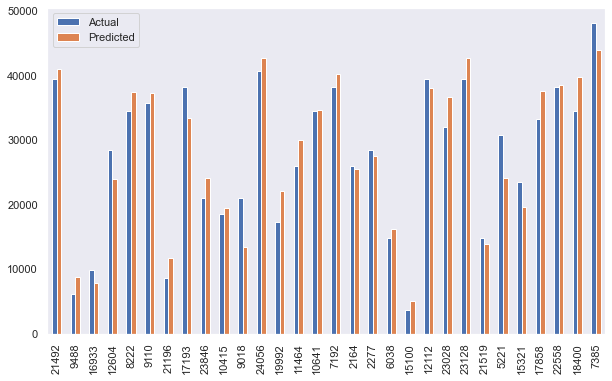

In [193]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [199]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ytest_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ytest_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ytest_pred)))

Mean Absolute Error: 2540.405300520722
Mean Squared Error: 9762619.554262355
Root Mean Squared Error: 3124.5190916783267


In [196]:
# R square on training data
r_sqr=mlp_reg.score(X_train, y_train)
print("R square on training data is",r_sqr)
# R square on testing data
r_sqr=mlp_reg.score(X_test, y_test)
print("R square on testing data is",r_sqr)



# adjusted R-squared on training data
adjr =1 - ( 1-mlp_reg.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y) - X_train.shape[1] - 1 )
print("Adj R-squared of the train data set is",adjr)
# adjusted R-squared
adjr =1 - ( 1-mlp_reg.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y) - X_test.shape[1] - 1 )
print("Adj R-squared of the test data set is",adjr)
# adjusted R-squared on entire data
adjr =1 - ( 1-mlp_reg.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print("Adj R-squared of the entire given dataset is",adjr)

#RMSE on Training data
predicted_train=mlp_reg.fit(X_train, y_train).predict(X_train)
rmse=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("RMSE on training data is",rmse)
#RMSE on Testing data
predicted_test=mlp_reg.fit(X_train, y_train).predict(X_test)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("RMSE on testing data is",rmse)



#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#MAPE on Training data
ytrain_predict = mlp_reg.predict(X_train) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the train data is ",MAPE(y_train,ytrain_predict))

#Defining MAPE function
#def MAPE(Y_actual,Y_Predicted):
 #   mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
 #   return mape

#MAPE on Testing data
ytest_predict = mlp_reg.predict(X_test) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the test data is ",MAPE(y_test,ytest_predict))


R square on training data is 0.9550617058799825
R square on testing data is 0.9515662384508282
Adj R-squared of the train data set is 0.9685109835099432
Adj R-squared of the test data set is 0.9854561014753037
Adj R-squared of the entire given dataset is 0.9539814835271008


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


RMSE on training data is 3034.385643645932
RMSE on testing data is 3127.6875463645147
MAPE on the train data is  12.277531891572528
MAPE on the test data is  12.840650395230432


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


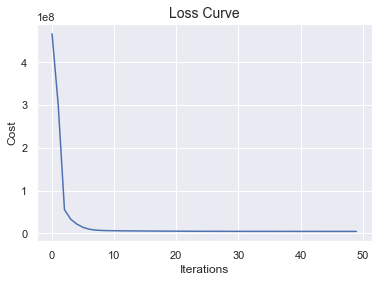

In [197]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [198]:
#Model score and Deduction for each Model in a DataFrame
MLP1_trainscore=r2_score(y_train,ytrain_predict)
MLP1_trainRMSE=np.sqrt(mean_squared_error(y_train,ytrain_predict))
MLP1_trainMSE=mean_squared_error(y_train,ytrain_predict)
MLP1_trainMAE=mean_absolute_error(y_train,ytrain_predict)
MLP1_trainMAPE=mean_absolute_percentage_error(y_train, ytrain_predict)

MLP1_testscore=r2_score(y_test,ytest_predict)
MLP1_testRMSE=np.sqrt(mean_squared_error(y_test,ytest_predict))
MLP1_testMSE=mean_squared_error(y_test,ytest_predict)
MLP1_testMAE=mean_absolute_error(y_test,ytest_predict)
MLP1_testMAPE=mean_absolute_percentage_error(y_test, ytest_predict)

MLP1_df=pd.DataFrame({'Method':['MLP before Grid Search'],'Test Score':MLP1_testscore,'RMSE_test': MLP1_testRMSE, 'MSE_test':MLP1_testMSE, 'MAE_test': MLP1_testMAE,'MAPE_test':MLP1_testMAPE,'Train Score':MLP1_trainscore,'RMSE_train': MLP1_trainRMSE, 'MSE_train': MLP1_trainMSE, 'MAE_train': MLP1_trainMAE,'MAPE_train':MLP1_trainMAPE})
metrics_df = pd.concat([metrics_df, MLP1_df])
metrics_df

,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.944903,3336.761928,1.113398e+07,2709.810029,0.150983,0.944689,3379.429663,1.142054e+07,2723.059029,0.153519
0,RF1 before Grid Search,0.951042,3145.357263,9.893272e+06,2517.596928,0.123976,0.993104,1193.250527,1.423847e+06,936.844338,0.046053
0,DT1 before Grid Search,0.906375,4349.658915,1.891953e+07,3397.942400,0.165102,1.000000,0.000000,0.000000e+00,0.000000,0.000000
0,MLP before Grid Search,0.951591,3127.687546,9.782429e+06,2542.985586,0.128407,0.955291,3038.312529,9.231343e+06,2461.060454,0.122775


<b>2.Grid search CV</b>

In [ ]:
#hyper parameter tuning



#param_grid = {
 #   'hidden_layer_sizes': [50, 100],
  #  'activation': ['logistic', 'relu'],
   # 'learning_rate': [ 'adaptive'],
    #'solver': ['sgd', 'adam'],
    #'tol': [0.1],
    #'max_iter' : [100]
    
#}




In [ ]:
#c=pd.concat([X_train, y_train],axis =1)

In [ ]:
#c.isnull().sum()

In [ ]:
 #c.isnull().values.any()

In [ ]:
#c.dtypes

In [ ]:
#cholesterol_level
#mpg_df['hp'] = mpg_df['hp'].astype('float64')  # converting the hp column from object / string type to float


In [ ]:
#grid = GridSearchCV(mlp_reg, param_grid, cv=3)
#grid.fit(X_train, y_train)

#print(grid.best_params_) 

In [ ]:
#grid_predictions = grid.predict(X1_test)

In [ ]:
#df_temp2 = pd.DataFrame({'Actual': y1_test, 'Predicted': grid_predictions})
#df_temp2.head()


In [ ]:
#df_temp2 = df_temp2.head(30)
#df_temp2.plot(kind='bar',figsize=(10,6))
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.show()

In [ ]:


#print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, grid_predictions))  
#print('Mean Squared Error:', metrics.mean_squared_error(y1_test, grid_predictions))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, grid_predictions)))

<b>3.DATAFRAME CREATION</b>

In [ ]:
#Model score and Deduction for each Model in a DataFrame
#MLP1_trainscore=r2_score(y1_train,ytrain_pred)
#MLP1_trainRMSE=np.sqrt(mean_squared_error(y1_train,ytrain_pred))
#MLP1_trainMSE=mean_squared_error(y1_train,ytrain_pred)
#MLP1_trainMAE=mean_absolute_error(y1_train,ytrain_pred)

#MLP1_testscore=r2_score(y1_test,ytest_pred)
#MLP1_testRMSE=np.sqrt(mean_squared_error(y1_test,ytest_pred))
#MLP1_testMSE=mean_squared_error(y1_test,ytest_pred)
#MLP1_testMAE=mean_absolute_error(y1_test,ytest_pred)

#MLP1_df=pd.DataFrame({'Method':['MLP1'],'Test Score':MLP1_testscore,'RMSE_test': MLP1_testRMSE, 'MSE_test': MLP1_testMSE, 'MAE_test': MLP1_testMAE,'Train Score':MLP1_trainscore,'RMSE_train': MLP1_trainRMSE, 'MSE_train': MLP1_trainMSE, 'MAE_train': MLP1_trainMAE})
#metrics_df = pd.concat([metrics_df, MLP1_df])

#metrics_df

<b>4.FEATURE IMPORTANCE</b>

<b><center>e.Gradient Boosting</center></b>

In [200]:
from sklearn.ensemble import GradientBoostingRegressor

In [201]:
GB1=GradientBoostingRegressor(n_estimators = 50, learning_rate = 0.1, random_state=0)
GB1.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=50, random_state=0)

In [202]:
ytrain_pred= GB1.predict(X_train)
ytest_pred= GB1.predict(X_test)

In [203]:
# R square on training data
r_sqr=GB1.score(X_train, y_train)
print("R square on training data is",r_sqr)
# R square on testing data
r_sqr=GB1.score(X_test, y_test)
print("R square on testing data is",r_sqr)



# adjusted R-squared on training data
adjr =1 - ( 1-GB1.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y) - X_train.shape[1] - 1 )
print("Adj R-squared of the train data set is",adjr)
# adjusted R-squared
adjr =1 - ( 1-GB1.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y) - X_test.shape[1] - 1 )
print("Adj R-squared of the test data set is",adjr)
# adjusted R-squared on entire data
adjr =1 - ( 1-GB1.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print("Adj R-squared of the entire given dataset is",adjr)

#RMSE on Training data
predicted_train=GB1.fit(X_train, y_train).predict(X_train)
rmse=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("RMSE on training data is",rmse)
#RMSE on Testing data
predicted_test=GB1.fit(X_train, y_train).predict(X_test)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("RMSE on testing data is",rmse)



#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#MAPE on Training data
ytrain_predict = GB1.predict(X_train) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the train data is ",MAPE(y_train,ytrain_predict))

#Defining MAPE function
#def MAPE(Y_actual,Y_Predicted):
 #   mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
 #   return mape

#MAPE on Testing data
ytest_predict = GB1.predict(X_test) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the test data is ",MAPE(y_test,ytest_predict))


R square on training data is 0.9557170884442033
R square on testing data is 0.9542674726439833
Adj R-squared of the train data set is 0.968970221066156
Adj R-squared of the test data set is 0.9862672397131794
Adj R-squared of the entire given dataset is 0.9552427074945834
RMSE on training data is 3023.8064279359137
RMSE on testing data is 3039.9943459427445
MAPE on the train data is  12.383096149236016
MAPE on the test data is  12.455828883357087


In [205]:
#Model score and Deduction for each Model in a DataFrame
GB1_trainscore=r2_score(y_train,ytrain_pred)
GB1_trainRMSE=np.sqrt(mean_squared_error(y_train,ytrain_pred))
GB1_trainMSE=mean_squared_error(y_train,ytrain_pred)
GB1_trainMAE=mean_absolute_error(y_train,ytrain_pred)
GB1_trainMAPE=mean_absolute_percentage_error(y_train, ytrain_predict)

GB1_testscore=r2_score(y_test,ytest_pred)
GB1_testRMSE=np.sqrt(mean_squared_error(y_test,ytest_pred))
GB1_testMSE=mean_squared_error(y_test,ytest_pred)
GB1_testMAE=mean_absolute_error(y_test,ytest_pred)
GB1_testMAPE=mean_absolute_percentage_error(y_test, ytest_predict)

GB1_df=pd.DataFrame({'Method':['Gradient Boosting'],'Test Score':GB1_testscore,'RMSE_test': GB1_testRMSE, 'MSE_test': GB1_testMSE, 'MAE_test': GB1_testMAE,'MAPE_test':GB1_testMAPE,'Train Score':GB1_trainscore,'RMSE_train': GB1_trainRMSE, 'MSE_train': GB1_trainMSE, 'MAE_train': GB1_trainMAE,'MAPE_train':GB1_trainMAPE})
metrics_df = pd.concat([metrics_df, GB1_df])

metrics_df

,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.944903,3336.761928,1.113398e+07,2709.810029,0.150983,0.944689,3379.429663,1.142054e+07,2723.059029,0.153519
0,RF1 before Grid Search,0.951042,3145.357263,9.893272e+06,2517.596928,0.123976,0.993104,1193.250527,1.423847e+06,936.844338,0.046053
0,DT1 before Grid Search,0.906375,4349.658915,1.891953e+07,3397.942400,0.165102,1.000000,0.000000,0.000000e+00,0.000000,0.000000
0,MLP before Grid Search,0.951591,3127.687546,9.782429e+06,2542.985586,0.128407,0.955291,3038.312529,9.231343e+06,2461.060454,0.122775
0,Gradient Boosting,0.954267,3039.994346,9.241566e+06,2461.314211,0.124558,0.955717,3023.806428,9.143405e+06,2442.156816,0.123831


<b><center>f.Ada Boosting</center></b>

In [206]:
from sklearn.ensemble import AdaBoostRegressor

In [207]:

ADB = AdaBoostRegressor(n_estimators = 50, learning_rate = 0.1, random_state=0)
ADB.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, random_state=0)

In [208]:
ytrain_pred= ADB.predict(X_train)
ytest_pred= ADB.predict(X_test)

In [209]:
# R square on training data
r_sqr=ADB.score(X_train, y_train)
print("R square on training data is",r_sqr)
# R square on testing data
r_sqr=ADB.score(X_test, y_test)
print("R square on testing data is",r_sqr)



# adjusted R-squared on training data
adjr =1 - ( 1-ADB.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y) - X_train.shape[1] - 1 )
print("Adj R-squared of the train data set is",adjr)
# adjusted R-squared
adjr =1 - ( 1-ADB.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y) - X_test.shape[1] - 1 )
print("Adj R-squared of the test data set is",adjr)
# adjusted R-squared on entire data
adjr =1 - ( 1-ADB.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print("Adj R-squared of the entire given dataset is",adjr)

#RMSE on Training data
predicted_train=ADB.fit(X_train, y_train).predict(X_train)
rmse=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("RMSE on training data is",rmse)
#RMSE on Testing data
predicted_test=ADB.fit(X_train, y_train).predict(X_test)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("RMSE on testing data is",rmse)



#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#MAPE on Training data
ytrain_predict = ADB.predict(X_train) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the train data is ",MAPE(y_train,ytrain_predict))

#Defining MAPE function
#def MAPE(Y_actual,Y_Predicted):
 #   mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
 #   return mape

#MAPE on Testing data
ytest_predict = ADB.predict(X_test) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the test data is ",MAPE(y_test,ytest_predict))


R square on training data is 0.9490827148988714
R square on testing data is 0.9479245322924726
Adj R-squared of the train data set is 0.9643214042371901
Adj R-squared of the test data set is 0.9843625542650564
Adj R-squared of the entire given dataset is 0.9486877114645861
RMSE on training data is 3242.414416345254
RMSE on testing data is 3243.9695130678247
MAPE on the train data is  14.082242288034294
MAPE on the test data is  14.118109854005395


In [210]:
#Model score and Deduction for each Model in a DataFrame
ADB_trainscore=r2_score(y_train,ytrain_pred)
ADB_trainRMSE=np.sqrt(mean_squared_error(y_train,ytrain_pred))
ADB_trainMSE=mean_squared_error(y_train,ytrain_pred)
ADB_trainMAE=mean_absolute_error(y_train,ytrain_pred)
ADB_trainMAPE=mean_absolute_percentage_error(y_train, ytrain_predict)

ADB_testscore=r2_score(y_test,ytest_pred)
ADB_testRMSE=np.sqrt(mean_squared_error(y_test,ytest_pred))
ADB_testMSE=mean_squared_error(y_test,ytest_pred)
ADB_testMAE=mean_absolute_error(y_test,ytest_pred)
ADB_testMAPE=mean_absolute_percentage_error(y_test, ytest_predict)

ADB_df=pd.DataFrame({'Method':['ADA Boosting'],'Test Score':ADB_testscore,'RMSE_test': ADB_testRMSE, 'MSE_test': ADB_testMSE, 'MAE_test': ADB_testMAE,'MAPE_test':ADB_testMAPE,'Train Score':ADB_trainscore,'RMSE_train': ADB_trainRMSE, 'MSE_train': ADB_trainMSE, 'MAE_train': ADB_trainMAE,'MAPE_train':ADB_trainMAPE})
metrics_df = pd.concat([metrics_df, ADB_df])

metrics_df

,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.944903,3336.761928,1.113398e+07,2709.810029,0.150983,0.944689,3379.429663,1.142054e+07,2723.059029,0.153519
0,RF1 before Grid Search,0.951042,3145.357263,9.893272e+06,2517.596928,0.123976,0.993104,1193.250527,1.423847e+06,936.844338,0.046053
0,DT1 before Grid Search,0.906375,4349.658915,1.891953e+07,3397.942400,0.165102,1.000000,0.000000,0.000000e+00,0.000000,0.000000
0,MLP before Grid Search,0.951591,3127.687546,9.782429e+06,2542.985586,0.128407,0.955291,3038.312529,9.231343e+06,2461.060454,0.122775
0,Gradient Boosting,0.954267,3039.994346,9.241566e+06,2461.314211,0.124558,0.955717,3023.806428,9.143405e+06,2442.156816,0.123831
0,ADA Boosting,0.947925,3243.969513,1.052334e+07,2625.982903,0.141181,0.949083,3242.414416,1.051325e+07,2622.873122,0.140822


<b>b. Test your predictive model against the test set using various appropriate performance metrics</b>

<b>c.Interpretation of the model(s)</b>

<b>2). Model Tuning and business implication</b>

<b>a. Ensemble modelling (if necessary)</b>

<b>1.BAGGING on CART</b>

In [211]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
cart1 = DecisionTreeRegressor()
Bagging_model1=BaggingRegressor(base_estimator=cart,n_estimators=10,random_state=1)
Bagging_model1.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=0),
                 random_state=1)

In [212]:
## Performance Matrix on train data set
ytrain_predict = Bagging_model1.predict(X_train)
model_score =Bagging_model1.score(X_train, y_train)
print(model_score)


0.9910581460448872


In [213]:
## Performance Matrix on test data set
ytest_predict = Bagging_model1.predict(X_test)
model_score = Bagging_model1.score(X_test, y_test)
print(model_score)


0.9475806332774053


In [214]:
# R square on training data
r_sqr=Bagging_model1.score(X_train, y_train)
print("R square on training data is",r_sqr)
# R square on testing data
r_sqr=Bagging_model1.score(X_test, y_test)
print("R square on testing data is",r_sqr)



# adjusted R-squared on training data
adjr =1 - ( 1-Bagging_model1.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y) - X_train.shape[1] - 1 )
print("Adj R-squared of the train data set is",adjr)
# adjusted R-squared
adjr =1 - ( 1-Bagging_model1.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y) - X_test.shape[1] - 1 )
print("Adj R-squared of the test data set is",adjr)
# adjusted R-squared on entire data
adjr =1 - ( 1-Bagging_model1.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print("Adj R-squared of the entire given dataset is",adjr)

#RMSE on Training data
predicted_train=Bagging_model1.fit(X_train, y_train).predict(X_train)
rmse=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("RMSE on training data is",rmse)
#RMSE on Testing data
predicted_test=Bagging_model1.fit(X_train, y_train).predict(X_test)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("RMSE on testing data is",rmse)



#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#MAPE on Training data
ytrain_predict = Bagging_model1.predict(X_train) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the train data is ",MAPE(y_train,ytrain_predict))

#Defining MAPE function
#def MAPE(Y_actual,Y_Predicted):
 #   mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
 #   return mape

#MAPE on Testing data
ytest_predict = Bagging_model1.predict(X_test) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the test data is ",MAPE(y_test,ytest_predict))


R square on training data is 0.9910581460448872
R square on testing data is 0.9475806332774053
Adj R-squared of the train data set is 0.9937342929419566
Adj R-squared of the test data set is 0.9842592867876211
Adj R-squared of the entire given dataset is 0.978188211068677
RMSE on training data is 1358.7816973047163
RMSE on testing data is 3254.663244812895
MAPE on the train data is  4.980903375230695
MAPE on the test data is  12.777263969885569


In [215]:
#Model score and Deduction for each Model in a DataFrame
BG1_trainscore=r2_score(y_train,ytrain_predict)
BG1_trainRMSE=np.sqrt(mean_squared_error(y_train,ytrain_predict))
BG1_trainMSE=mean_squared_error(y_train,ytrain_predict)
BG1_trainMAE=mean_absolute_error(y_train,ytrain_predict)
BG1_trainMAPE=mean_absolute_percentage_error(y_train, ytrain_predict)

BG1_testscore=r2_score(y_test,ytest_predict)
BG1_testRMSE=np.sqrt(mean_squared_error(y_test,ytest_predict))
BG1_testMSE=mean_squared_error(y_test,ytest_predict)
BG1_testMAE=mean_absolute_error(y_test,ytest_predict)
BG1_testMAPE=mean_absolute_percentage_error(y_test, ytest_predict)

BG1_df=pd.DataFrame({'Method':['Bagging on DT'],'Test Score':BG1_testscore,'RMSE_test': BG1_testRMSE, 'MSE_test':BG1_testMSE, 'MAE_test': BG1_testMAE,'MAPE_test':BG1_testMAPE,'Train Score':BG1_trainscore,'RMSE_train': BG1_trainRMSE, 'MSE_train': BG1_trainMSE, 'MAE_train': BG1_trainMAE,'MAPE_train':BG1_trainMAPE})
metrics_df = pd.concat([metrics_df, BG1_df])

metrics_df

,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.944903,3336.761928,1.113398e+07,2709.810029,0.150983,0.944689,3379.429663,1.142054e+07,2723.059029,0.153519
0,RF1 before Grid Search,0.951042,3145.357263,9.893272e+06,2517.596928,0.123976,0.993104,1193.250527,1.423847e+06,936.844338,0.046053
0,DT1 before Grid Search,0.906375,4349.658915,1.891953e+07,3397.942400,0.165102,1.000000,0.000000,0.000000e+00,0.000000,0.000000
0,MLP before Grid Search,0.951591,3127.687546,9.782429e+06,2542.985586,0.128407,0.955291,3038.312529,9.231343e+06,2461.060454,0.122775
0,Gradient Boosting,0.954267,3039.994346,9.241566e+06,2461.314211,0.124558,0.955717,3023.806428,9.143405e+06,2442.156816,0.123831
0,ADA Boosting,0.947925,3243.969513,1.052334e+07,2625.982903,0.141181,0.949083,3242.414416,1.051325e+07,2622.873122,0.140822
0,Bagging on DT,0.947581,3254.663245,1.059283e+07,2590.560880,0.127773,0.991058,1358.781697,1.846288e+06,1012.056286,0.049809


<b>BAGGING ON RANDOM FOREST</b>

In [216]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
RF1 = RandomForestRegressor()
Bagging_model2=BaggingRegressor(base_estimator=RF1,n_estimators=10,random_state=1)
Bagging_model2.fit(X_train, y_train)

BaggingRegressor(base_estimator=RandomForestRegressor(), random_state=1)

In [217]:
## Performance Matrix on train data set
ytrain_predict = Bagging_model2.predict(X_train)
model_score =Bagging_model2.score(X_train, y_train)
print(model_score)


0.9831148979655132


In [218]:
## Performance Matrix on test data set
ytest_predict = Bagging_model2.predict(X_test)
model_score = Bagging_model2.score(X_test, y_test)
print(model_score)


0.9530416362463913


In [219]:
# R square on training data
r_sqr=Bagging_model2.score(X_train, y_train)
print("R square on training data is",r_sqr)
# R square on testing data
r_sqr=Bagging_model2.score(X_test, y_test)
print("R square on testing data is",r_sqr)



# adjusted R-squared on training data
adjr =1 - ( 1-Bagging_model2.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y) - X_train.shape[1] - 1 )
print("Adj R-squared of the train data set is",adjr)
# adjusted R-squared
adjr =1 - ( 1-Bagging_model2.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y) - X_test.shape[1] - 1 )
print("Adj R-squared of the test data set is",adjr)
# adjusted R-squared on entire data
adjr =1 - ( 1-Bagging_model2.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print("Adj R-squared of the entire given dataset is",adjr)

#RMSE on Training data
predicted_train=Bagging_model2.fit(X_train, y_train).predict(X_train)
rmse=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("RMSE on training data is",rmse)
#RMSE on Testing data
predicted_test=Bagging_model2.fit(X_train, y_train).predict(X_test)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("RMSE on testing data is",rmse)



#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#MAPE on Training data
ytrain_predict = Bagging_model2.predict(X_train) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the train data is ",MAPE(y_train,ytrain_predict))

#Defining MAPE function
#def MAPE(Y_actual,Y_Predicted):
 #   mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
 #   return mape

#MAPE on Testing data
ytest_predict = Bagging_model2.predict(X_test) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the test data is ",MAPE(y_test,ytest_predict))


R square on training data is 0.9831148979655132
R square on testing data is 0.9530416362463913
Adj R-squared of the train data set is 0.9881683257717742
Adj R-squared of the test data set is 0.9858991402799699
Adj R-squared of the entire given dataset is 0.9742017896583267
RMSE on training data is 1867.1867068340277
RMSE on testing data is 3080.467649623675
MAPE on the train data is  7.344121992663885
MAPE on the test data is  12.244645770664475


In [220]:
#Model score and Deduction for each Model in a DataFrame
BG1_trainscore=r2_score(y_train,ytrain_predict)
BG1_trainRMSE=np.sqrt(mean_squared_error(y_train,ytrain_predict))
BG1_trainMSE=mean_squared_error(y_train,ytrain_predict)
BG1_trainMAE=mean_absolute_error(y_train,ytrain_predict)
BG1_trainMAPE=mean_absolute_percentage_error(y_train, ytrain_predict)

BG1_testscore=r2_score(y_test,ytest_predict)
BG1_testRMSE=np.sqrt(mean_squared_error(y_test,ytest_predict))
BG1_testMSE=mean_squared_error(y_test,ytest_predict)
BG1_testMAE=mean_absolute_error(y_test,ytest_predict)
BG1_testnMAPE=mean_absolute_percentage_error(y_test, ytest_predict)

BG1_df=pd.DataFrame({'Method':['Bagging on RF'],'Test Score':BG1_testscore,'RMSE_test': BG1_testRMSE, 'MSE_test':BG1_testMSE, 'MAE_test': BG1_testMAE,'MAPE_test':BG1_testMAPE,'Train Score':BG1_trainscore,'RMSE_train': BG1_trainRMSE, 'MSE_train': BG1_trainMSE, 'MAE_train': BG1_trainMAE,'MAPE_train':BG1_trainMAPE})
metrics_df = pd.concat([metrics_df, BG1_df])

metrics_df

,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.944903,3336.761928,1.113398e+07,2709.810029,0.150983,0.944689,3379.429663,1.142054e+07,2723.059029,0.153519
0,RF1 before Grid Search,0.951042,3145.357263,9.893272e+06,2517.596928,0.123976,0.993104,1193.250527,1.423847e+06,936.844338,0.046053
0,DT1 before Grid Search,0.906375,4349.658915,1.891953e+07,3397.942400,0.165102,1.000000,0.000000,0.000000e+00,0.000000,0.000000
0,MLP before Grid Search,0.951591,3127.687546,9.782429e+06,2542.985586,0.128407,0.955291,3038.312529,9.231343e+06,2461.060454,0.122775
0,Gradient Boosting,0.954267,3039.994346,9.241566e+06,2461.314211,0.124558,0.955717,3023.806428,9.143405e+06,2442.156816,0.123831
0,ADA Boosting,0.947925,3243.969513,1.052334e+07,2625.982903,0.141181,0.949083,3242.414416,1.051325e+07,2622.873122,0.140822
0,Bagging on DT,0.947581,3254.663245,1.059283e+07,2590.560880,0.127773,0.991058,1358.781697,1.846288e+06,1012.056286,0.049809
0,Bagging on RF,0.953042,3080.467650,9.489281e+06,2482.490451,0.127773,0.983115,1867.186707,3.486386e+06,1484.923464,0.073441


<b>b. Any other model tuning measures (if applicable)</b>

<b>c. Interpretation of the most optimum model and its implication on the business</b>